In [ ]:
# evaluated by GINI index
# Gradient Boosting Decision Tree model : Light GBM

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv', na_values=['-1','-1.0'])
test = pd.read_csv('test.csv', na_values=['-1','-1.0'])

In [3]:
print(train.shape, test.shape)

(595212, 59) (892816, 58)


In [4]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

In [6]:
np.unique(train['target'])

array([0, 1], dtype=int64)

In [7]:
# compute distribution
1.0 * sum(train['target'])/train.shape[0] # 3.6%

0.036447517859182946

In [8]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
test['target'] = np.nan # fill target data in test set with nan
df = pd.concat([train, test], axis=0, sort=True)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [10]:
def bar_plot(col, data, hue=None):
    f, ax = plt.subplots(figsize=(10,5))
    sns.countplot(x=col, hue=hue, data=data, alpha=0.5)
    plt.show()

In [11]:
def dist_plot(col, data):
    f, ax = plt.subplots(figsize=(10,5))
    sns.distplot(data[col].dropna(), kde=False, bins=10)
    plt.show()

In [12]:
binary = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
          'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 
          'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
category = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 
            'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 
            'ps_car_10_cat', 'ps_car_11_cat']
integer = ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 
           'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 
           'ps_calc_14', 'ps_car_11']
floats = ['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_car_12', 'ps_car_13',
          'ps_car_14', 'ps_car_15']

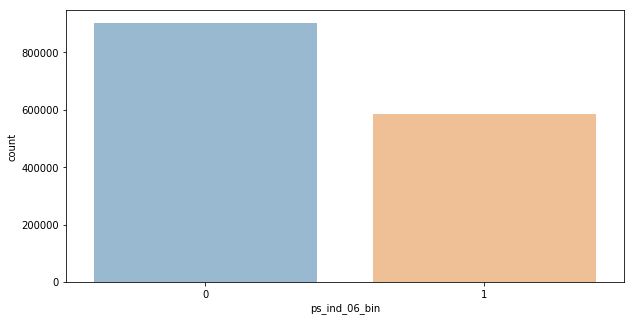

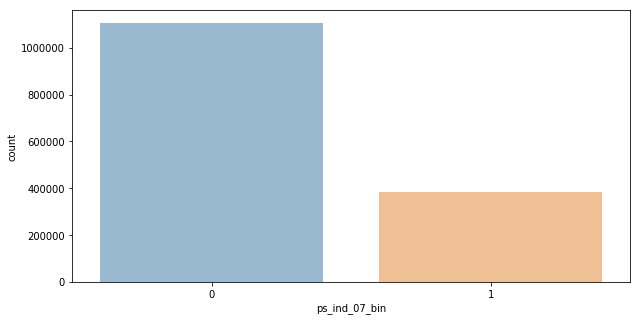

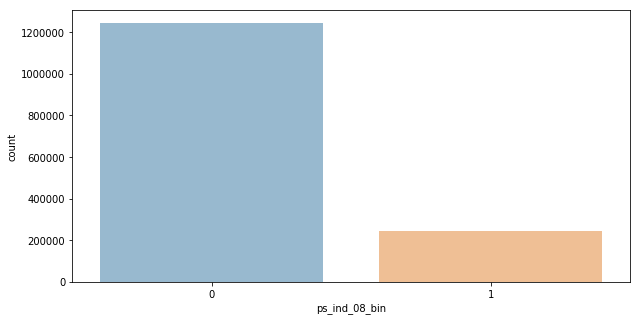

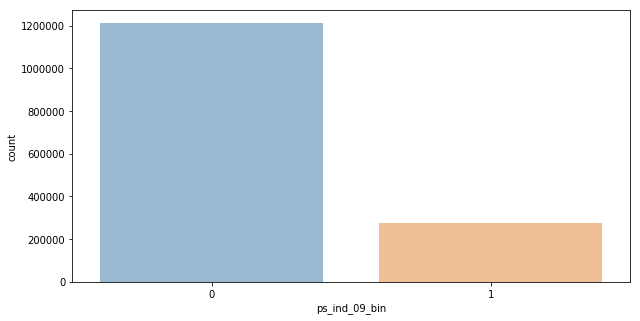

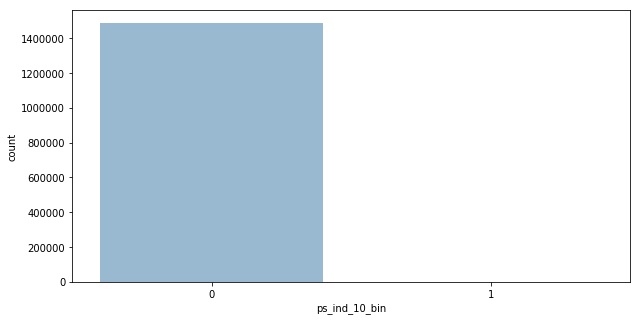

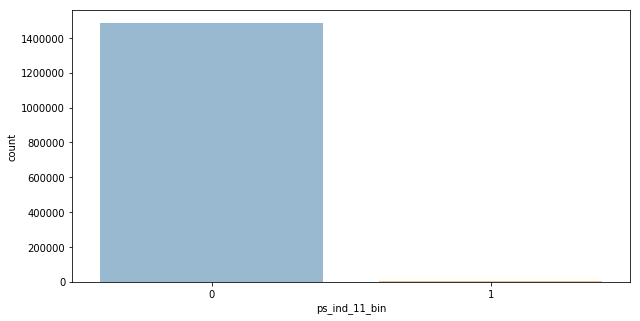

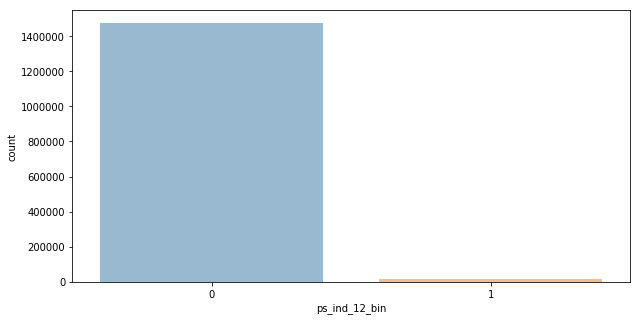

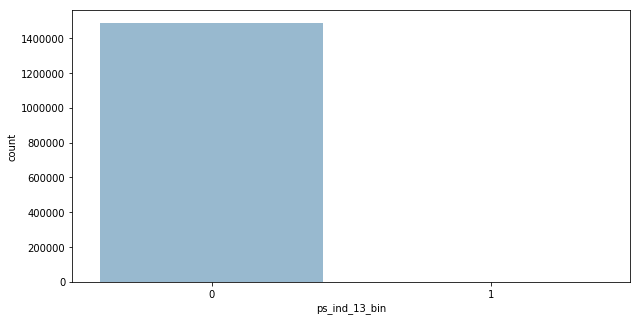

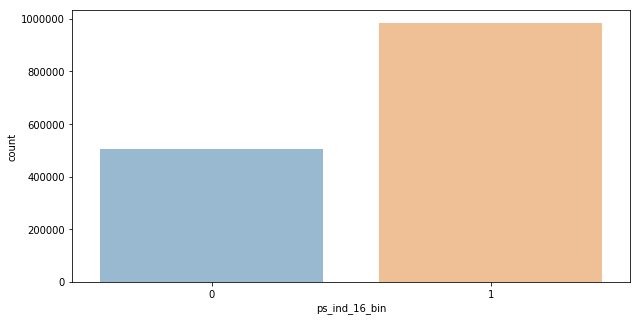

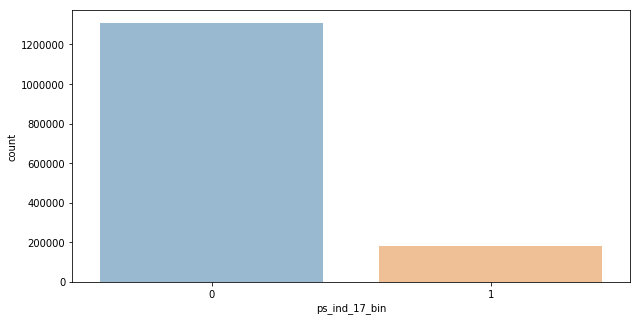

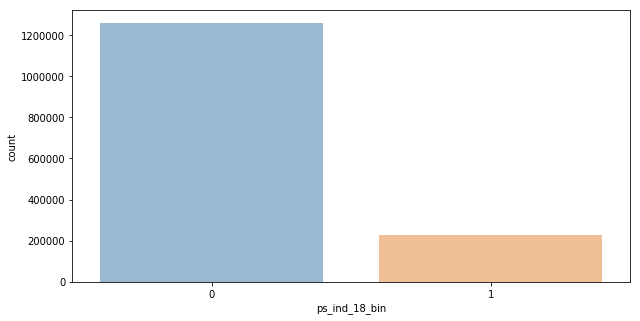

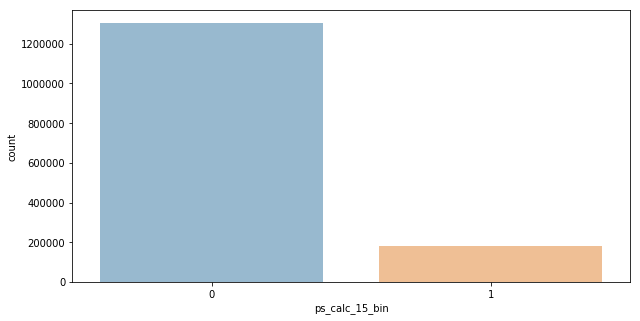

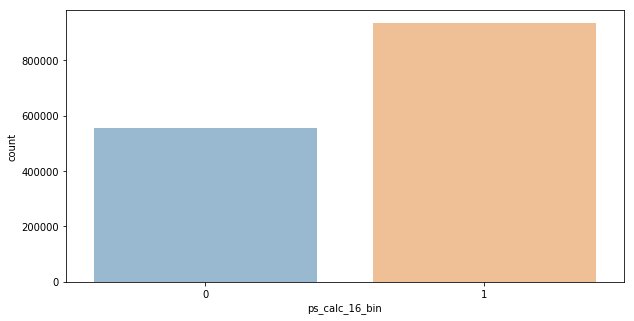

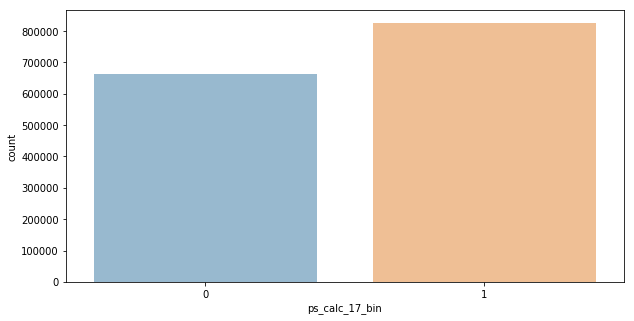

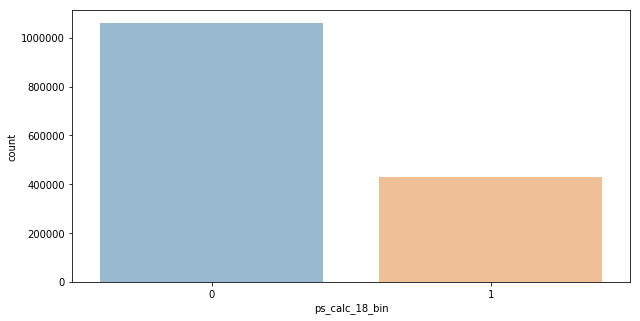

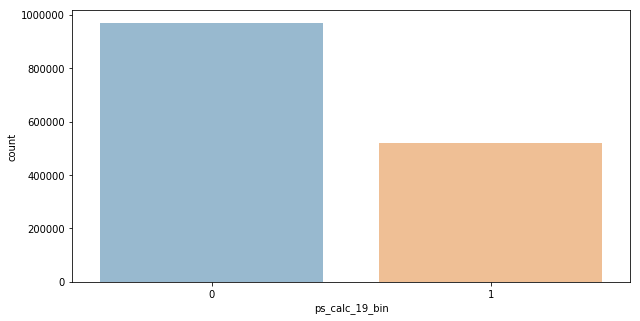

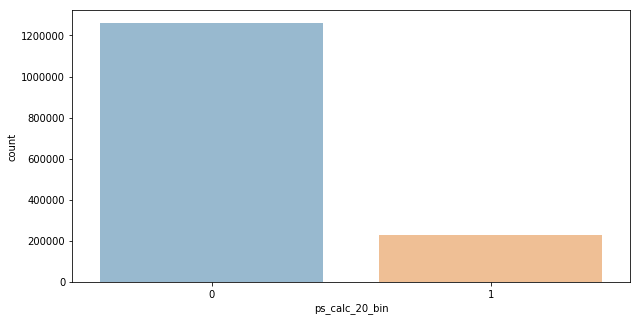

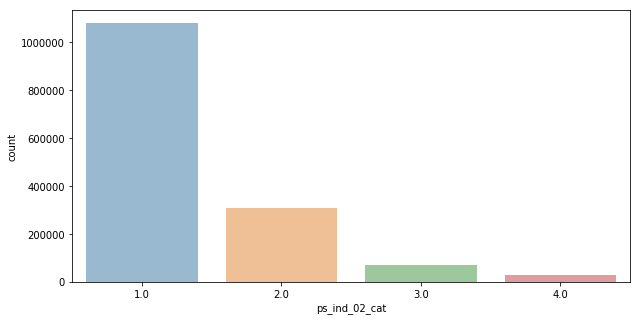

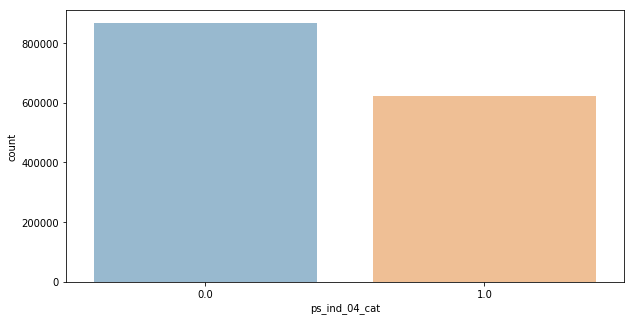

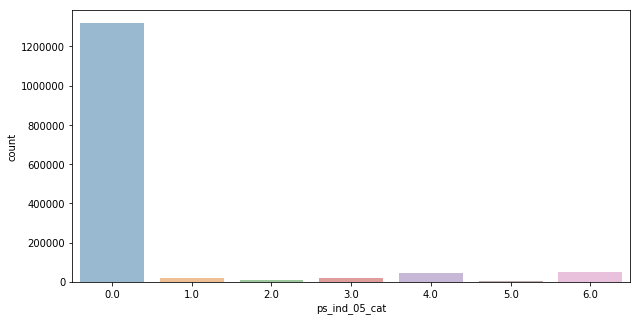

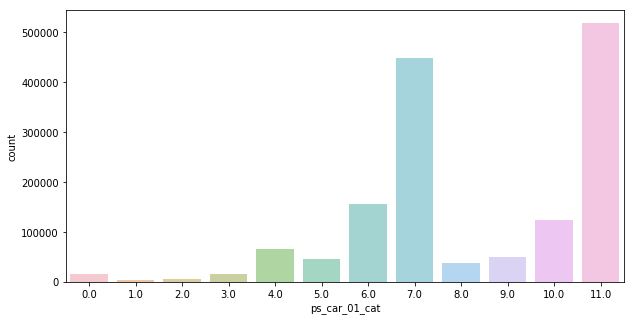

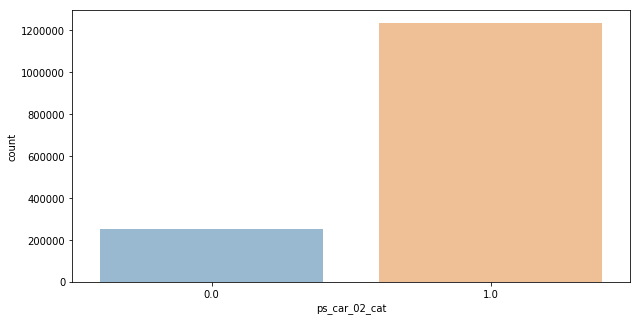

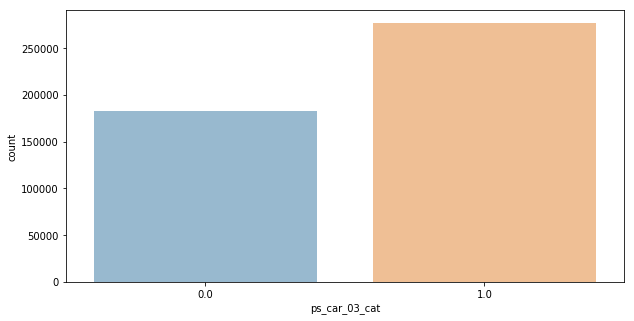

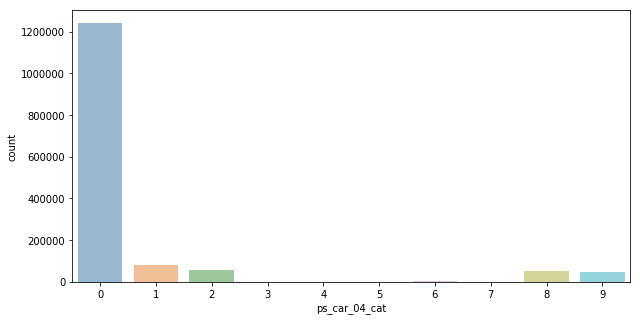

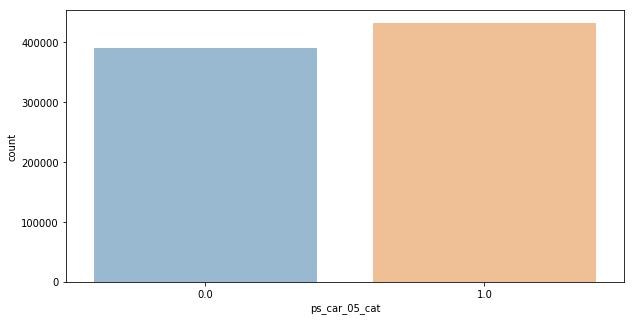

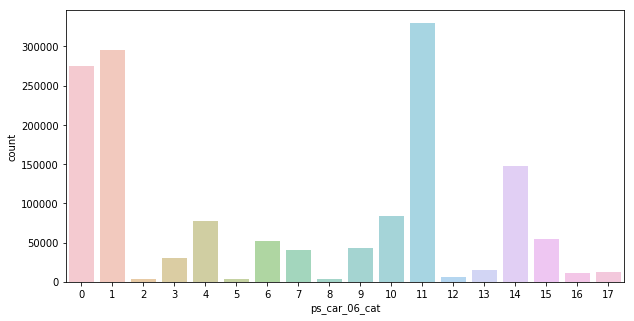

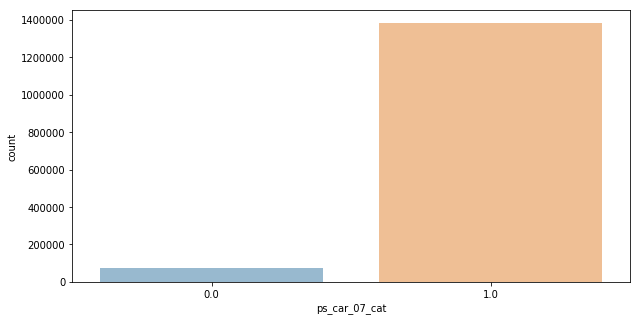

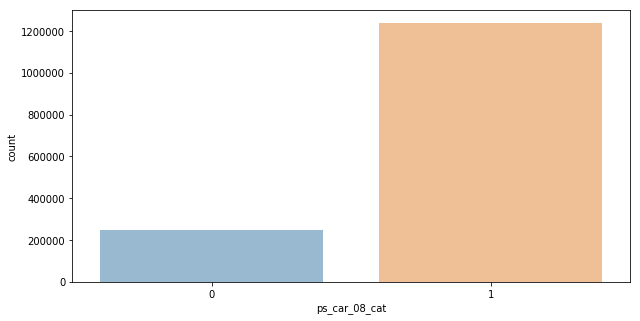

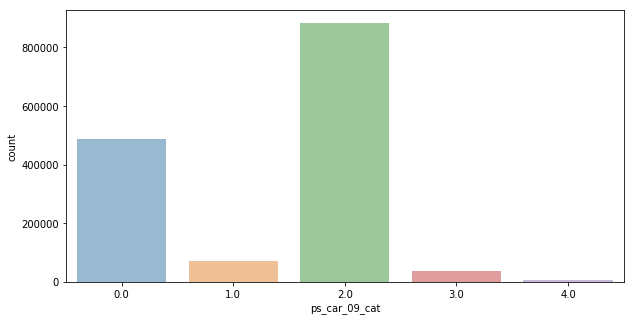

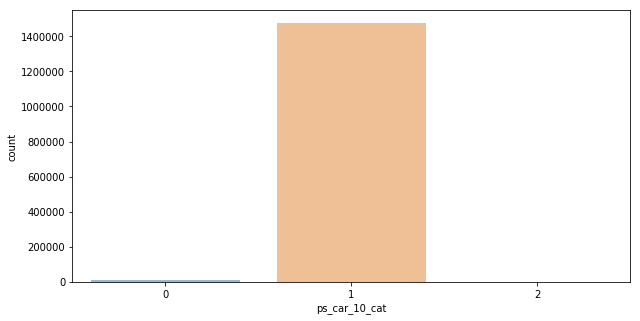

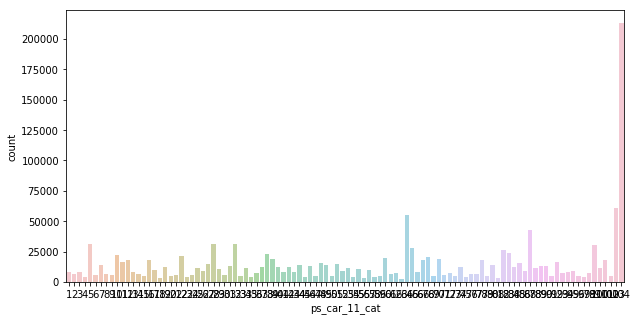

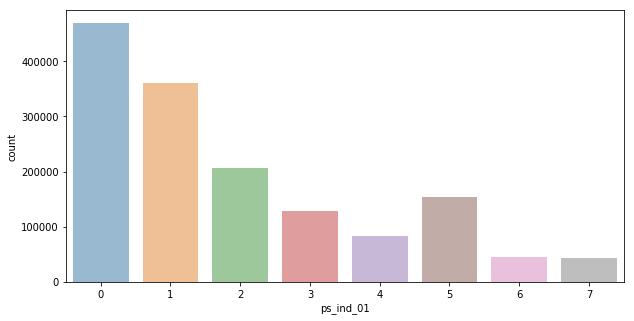

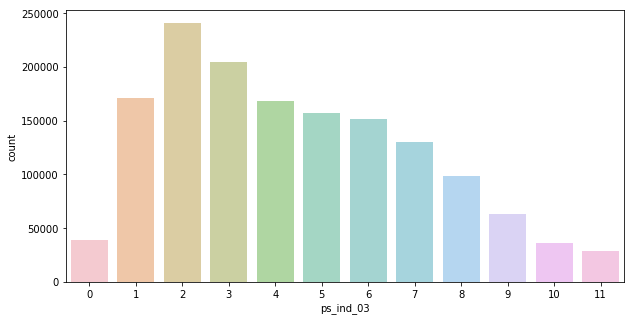

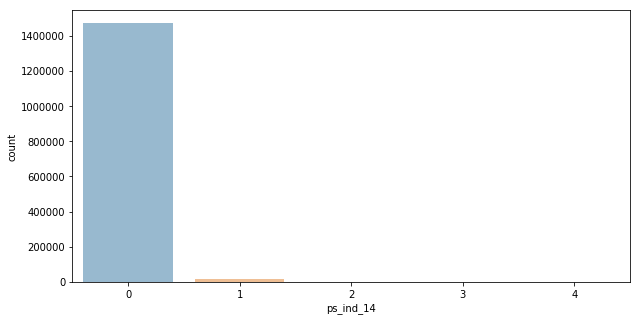

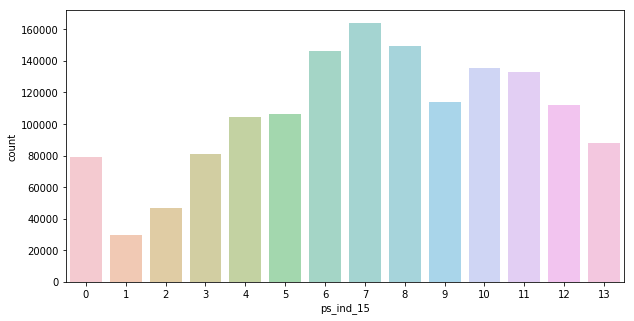

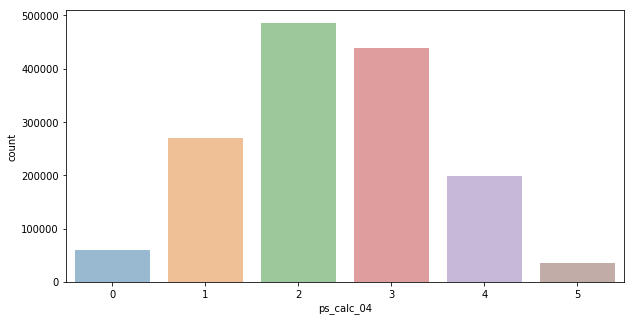

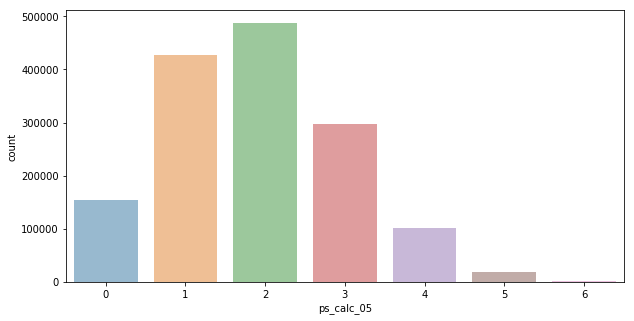

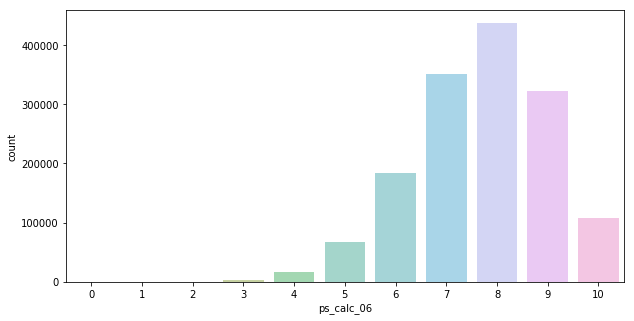

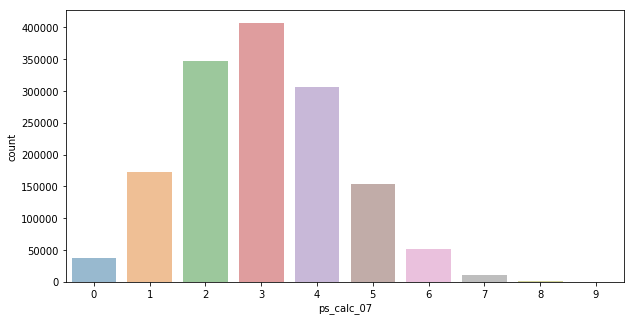

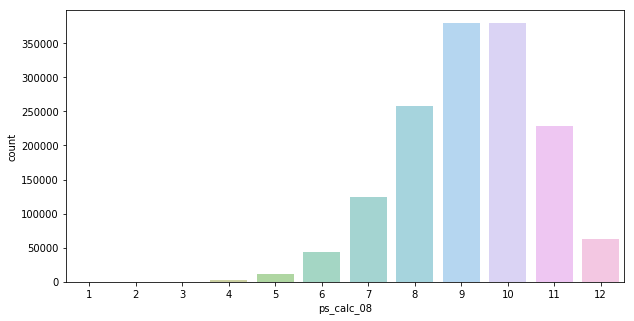

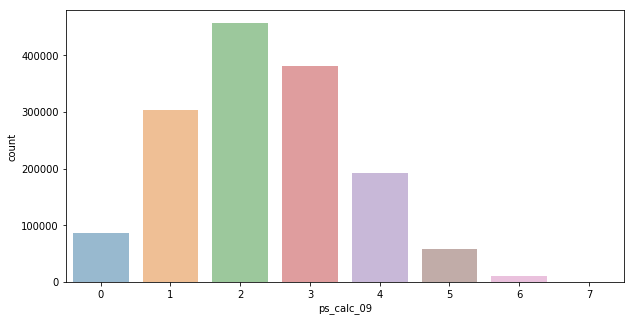

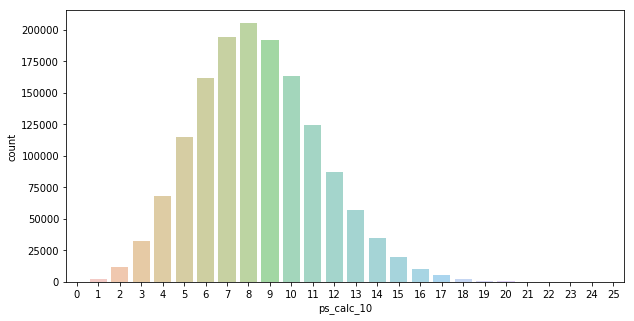

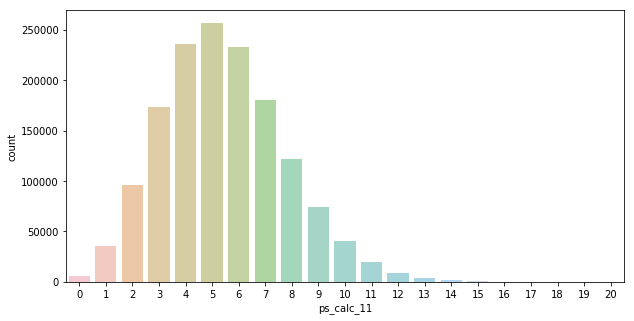

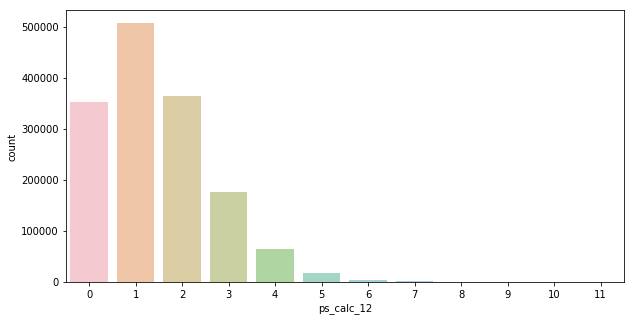

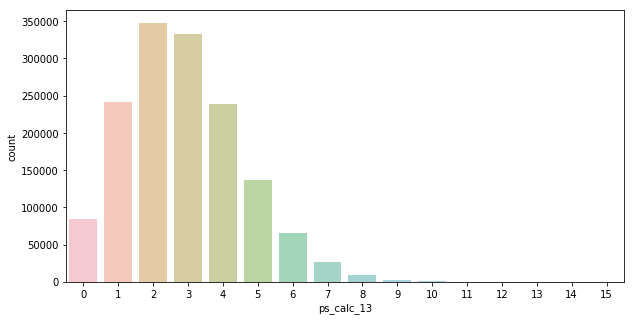

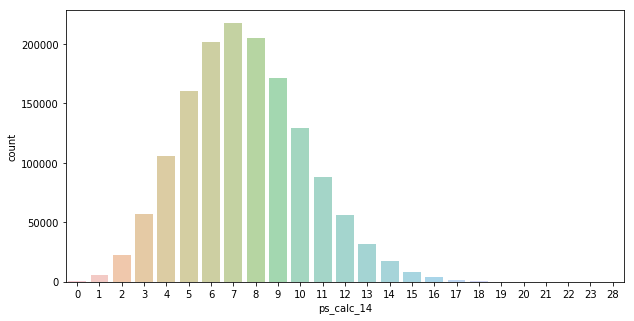

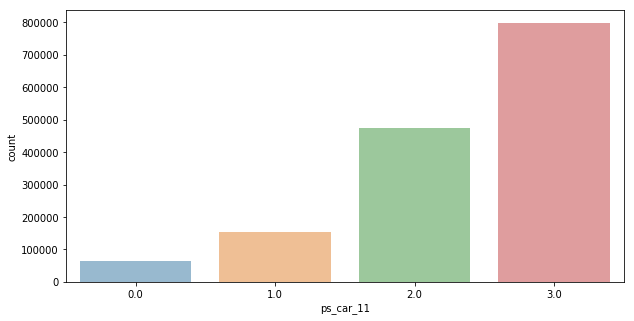

In [13]:
for col in binary + category + integer:
    bar_plot(col, df)

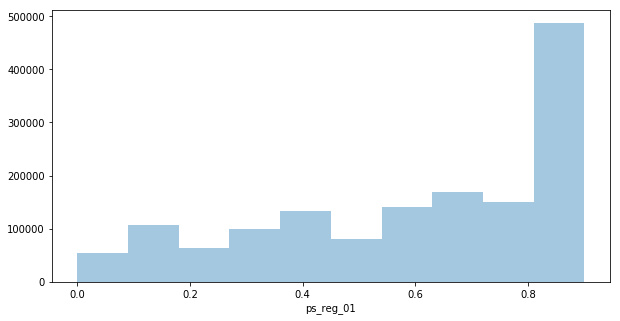

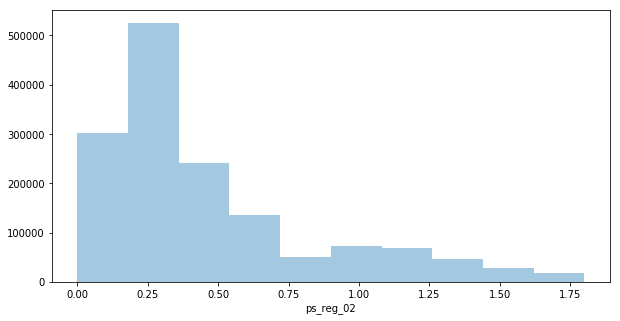

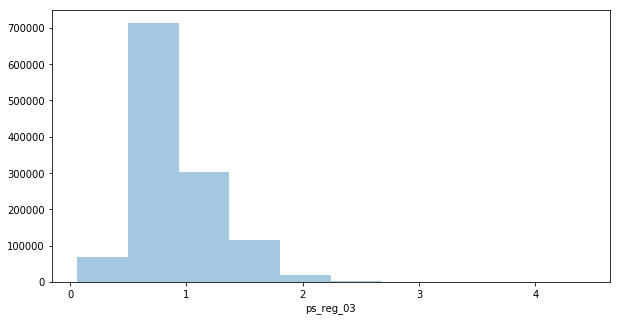

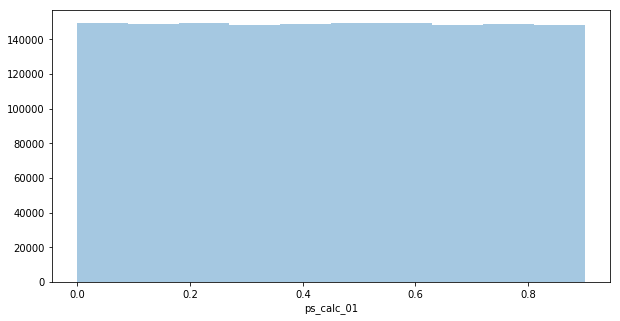

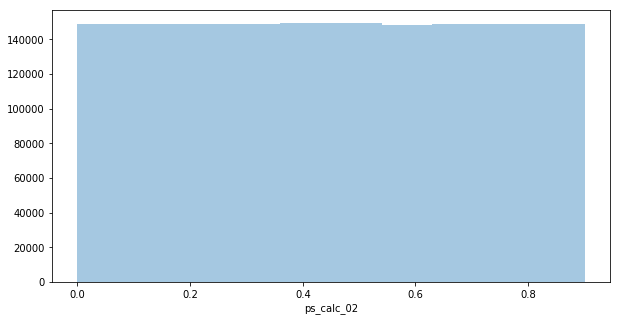

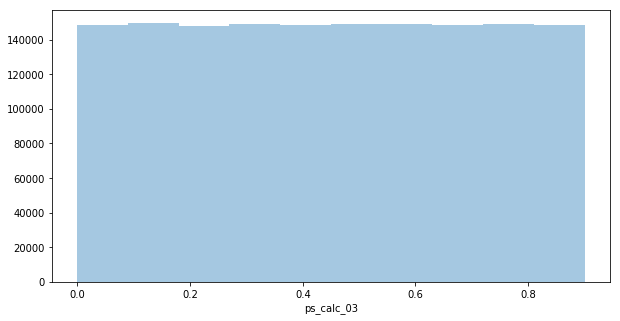

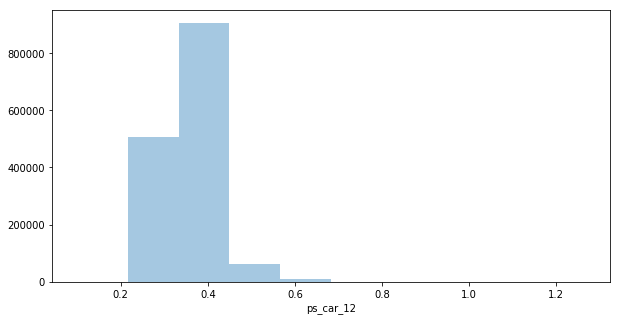

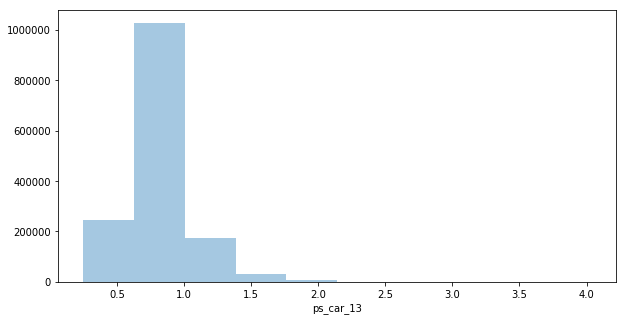

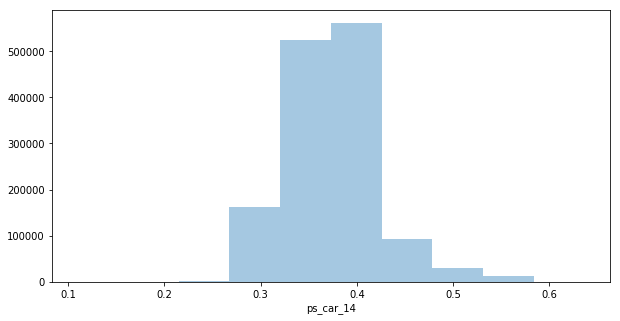

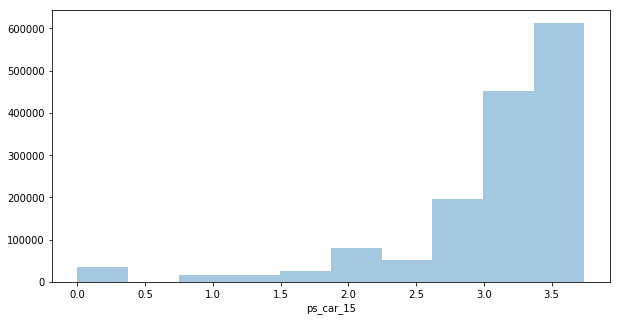

In [14]:
for col in floats:
    dist_plot(col, df)

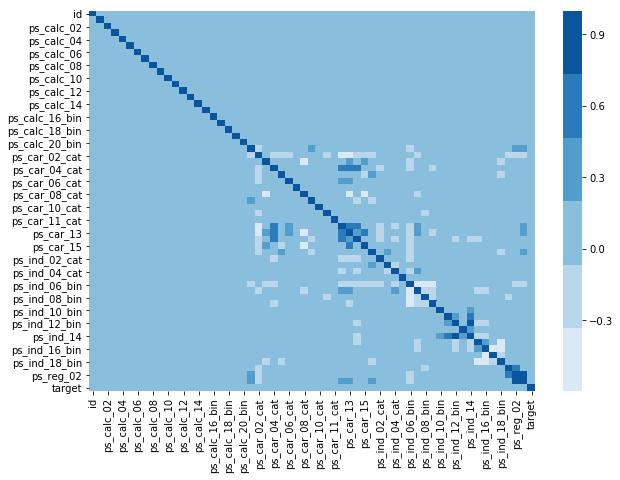

In [15]:
corr = df.corr()

cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, cmap = cmap)

In [ ]:
# typically, if correlation > 0.95, then remove one variable...

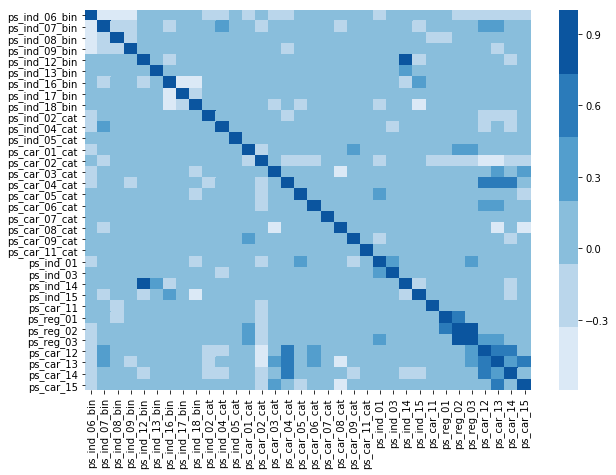

In [17]:
features = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 
          'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin',
          'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 
          'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 
          'ps_car_11_cat', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11',
          'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
          'ps_car_14', 'ps_car_15']
corr_sub = df[features].corr()
f, ax = plt.subplots(figsize = (10, 7))
sns.heatmap(corr_sub, cmap = cmap)

In [18]:
# single variable vs target variable
def bar_plot_ci(col, data):
    f, ax = plt.subplots(figsize=(10,5))
    sns.barplot(x=col, y='target', data = data)
    plt.show()

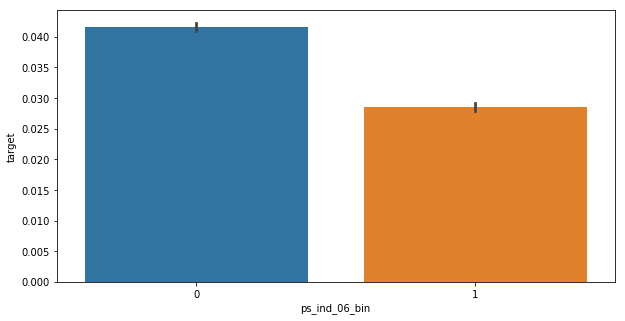

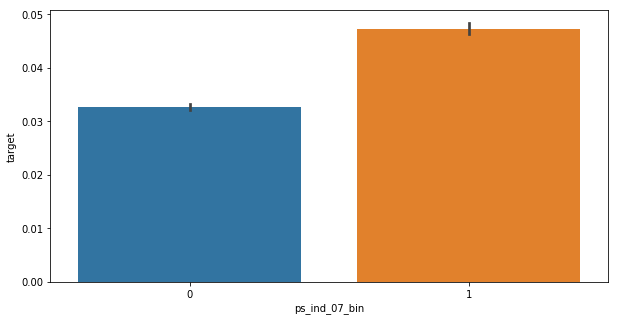

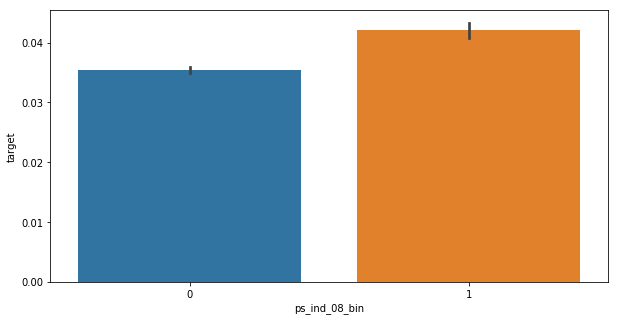

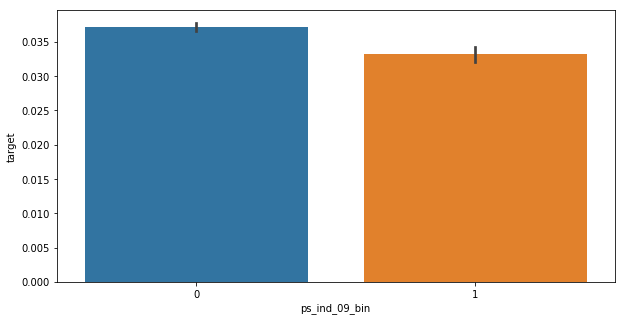

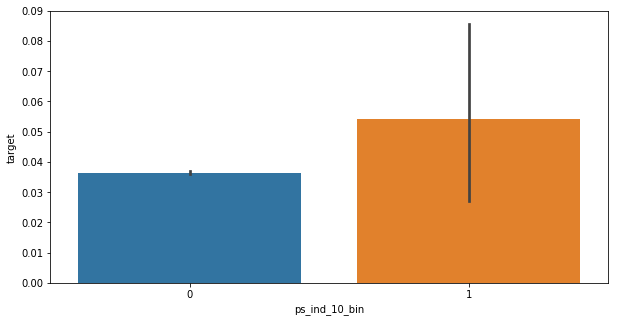

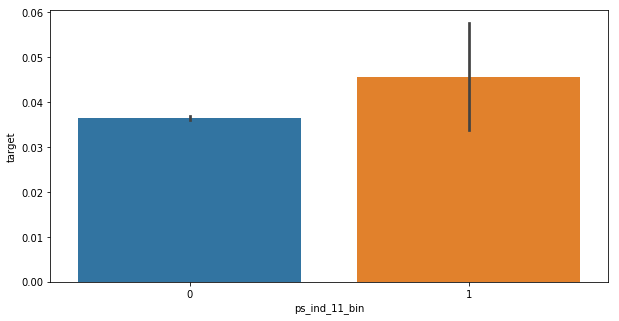

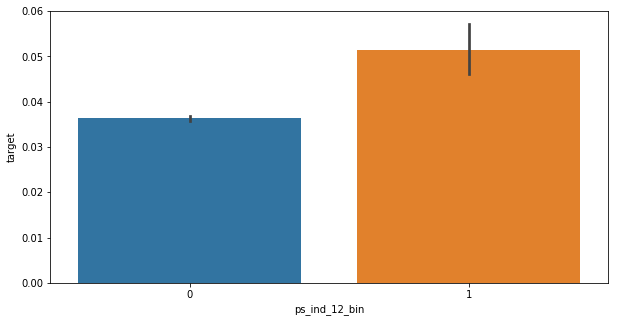

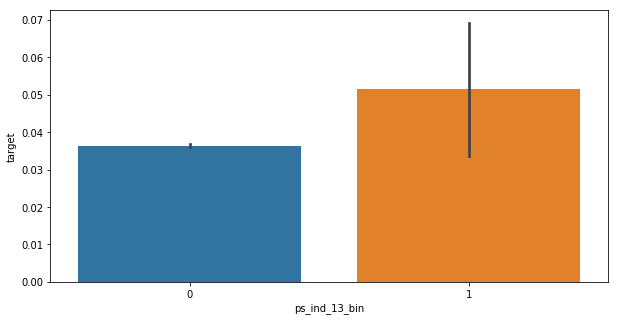

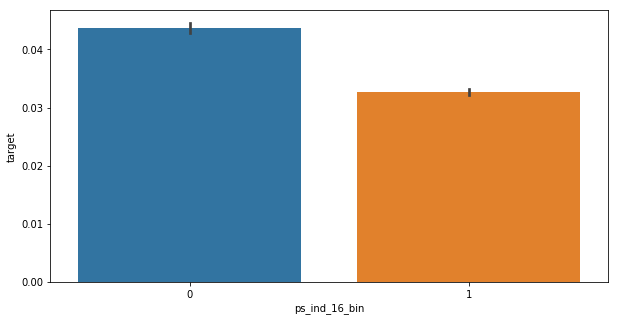

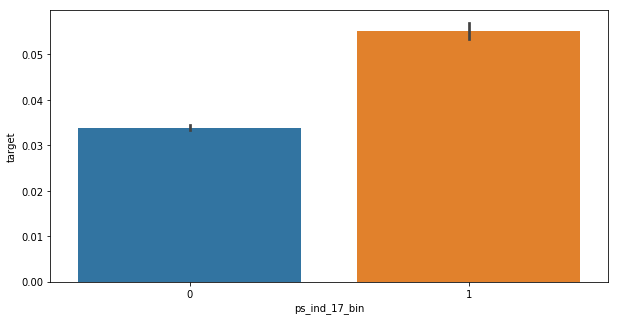

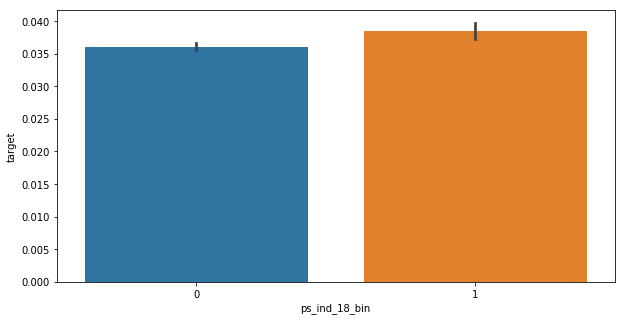

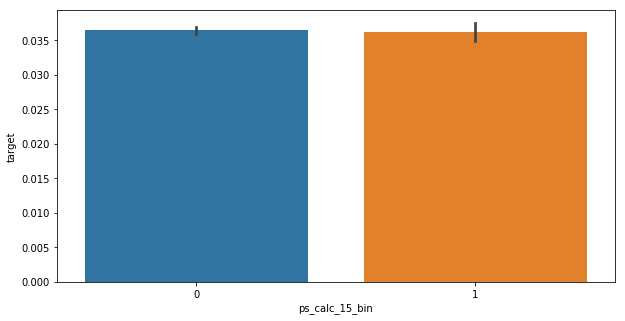

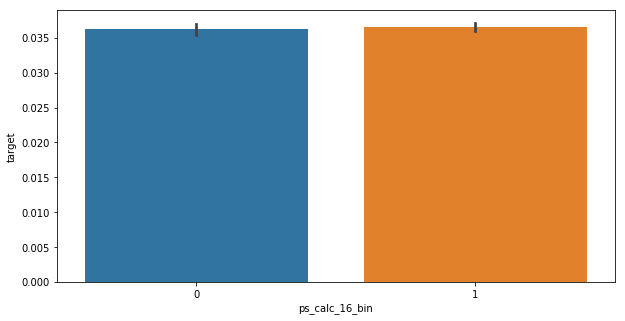

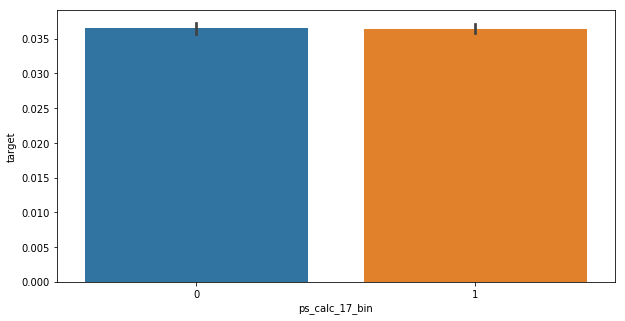

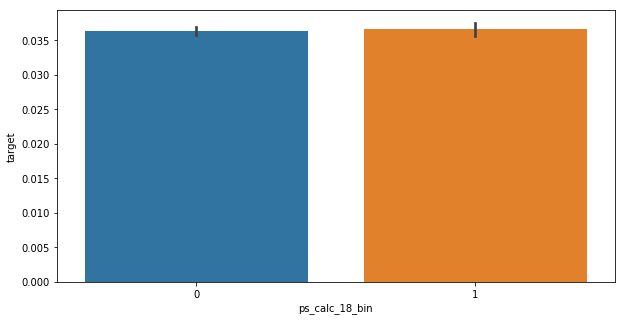

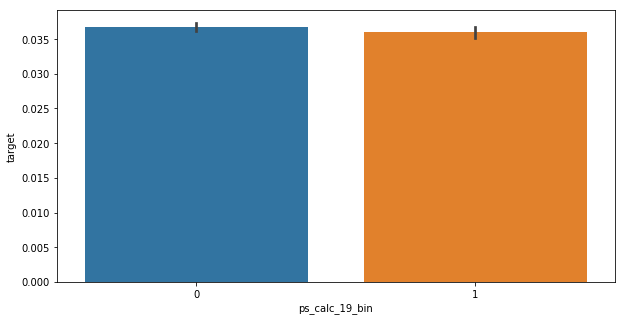

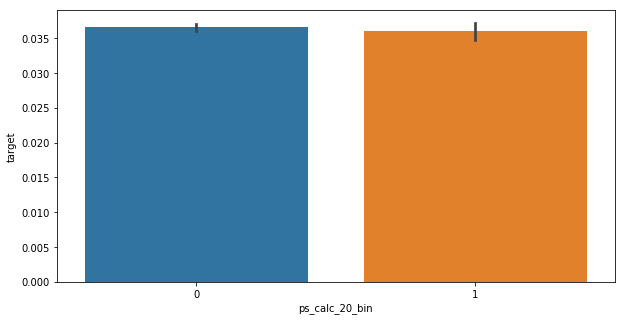

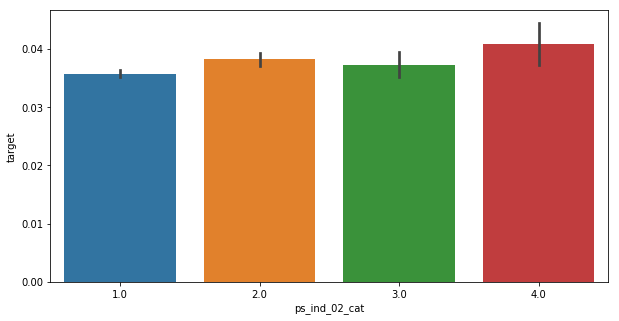

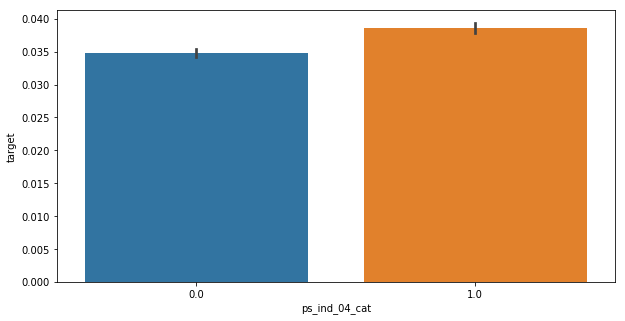

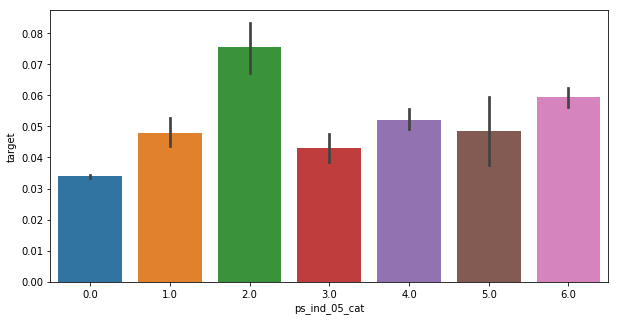

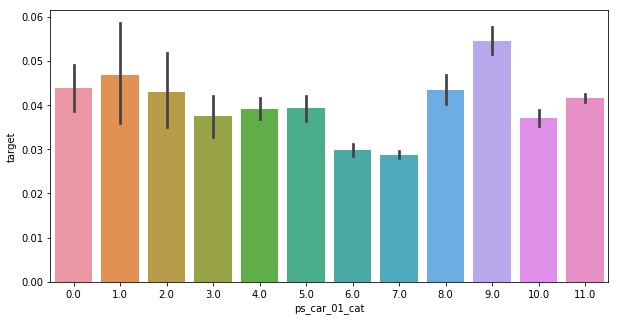

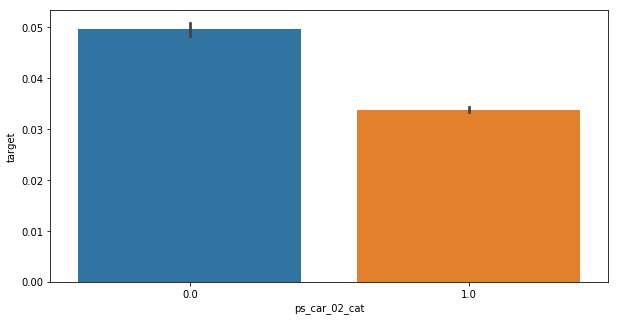

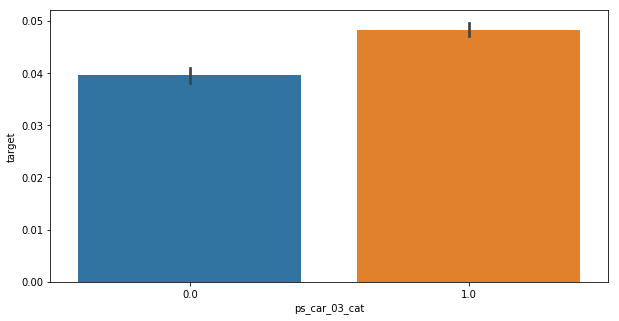

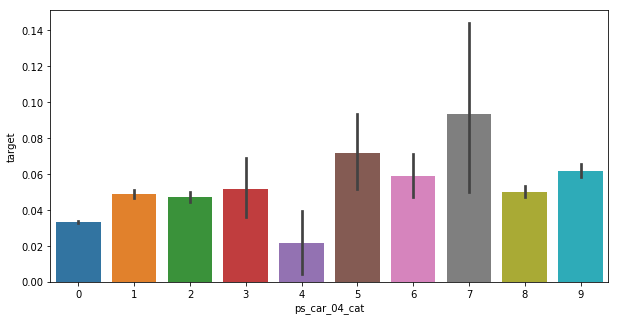

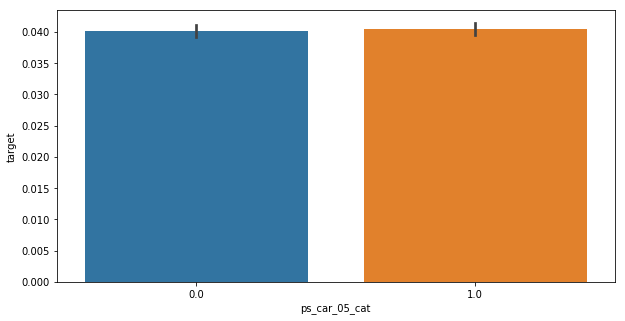

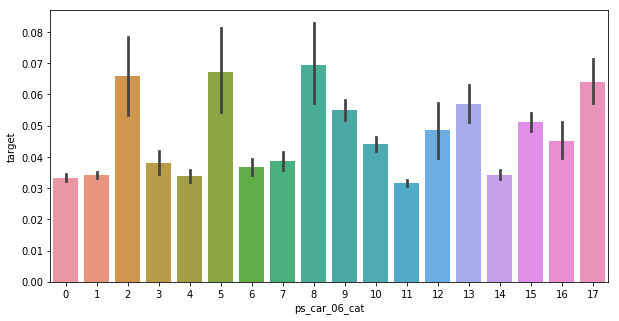

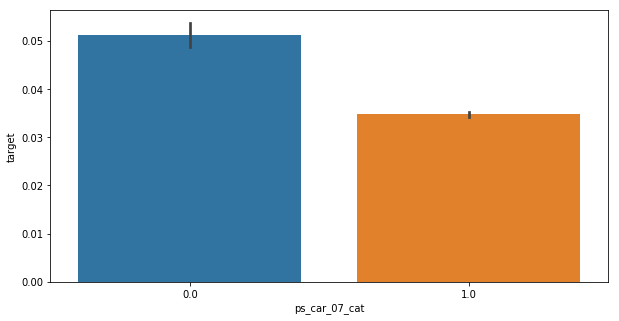

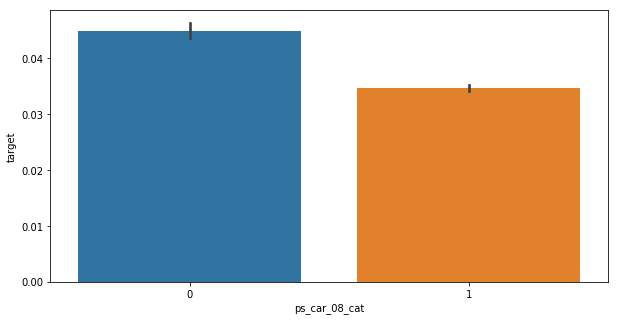

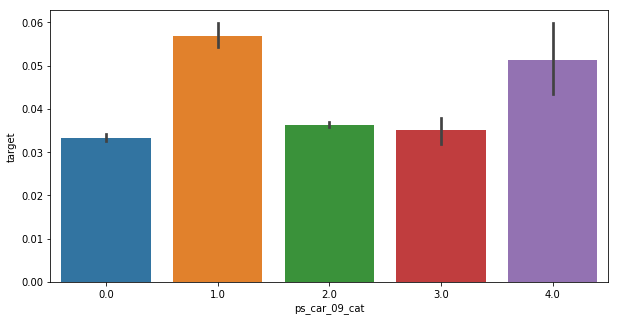

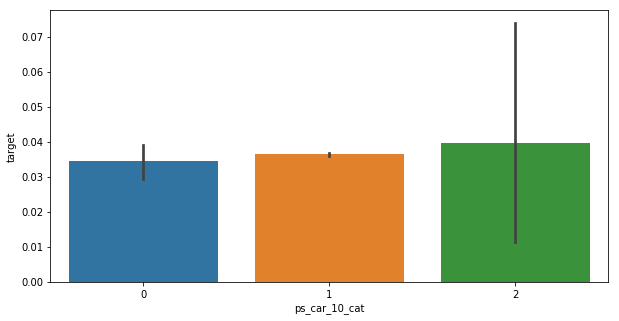

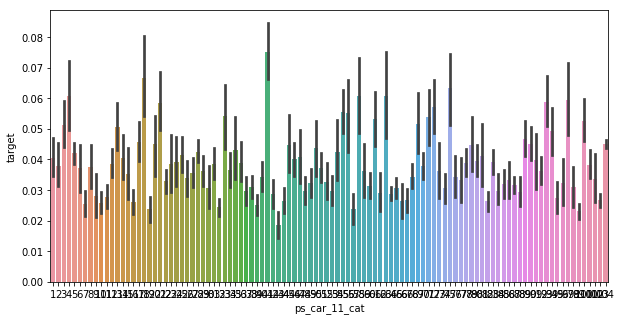

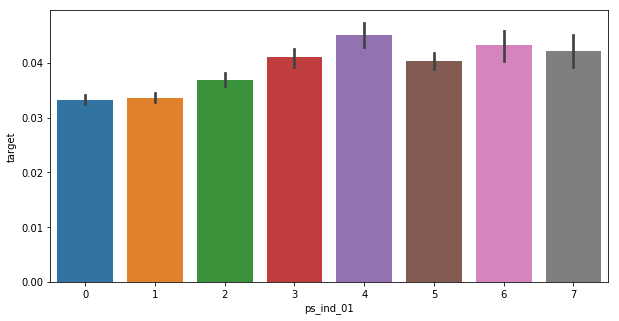

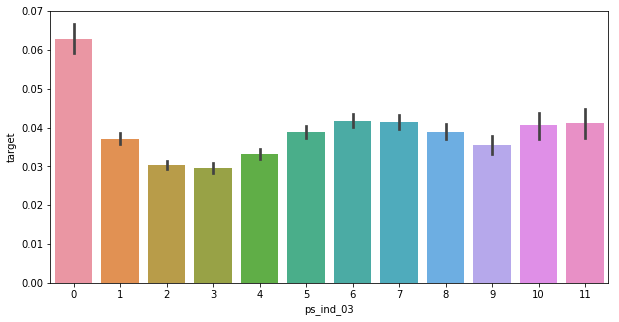

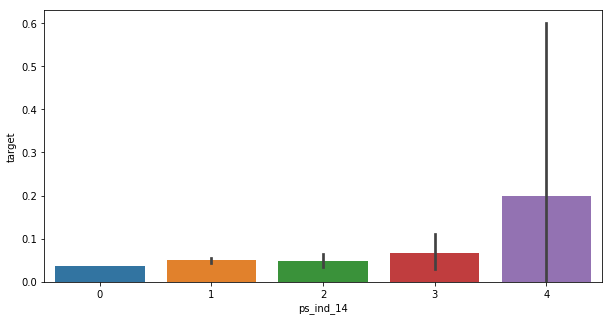

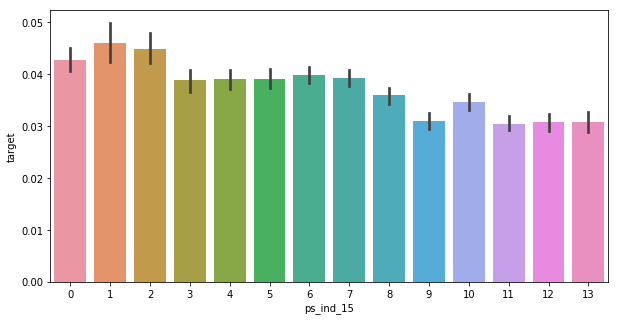

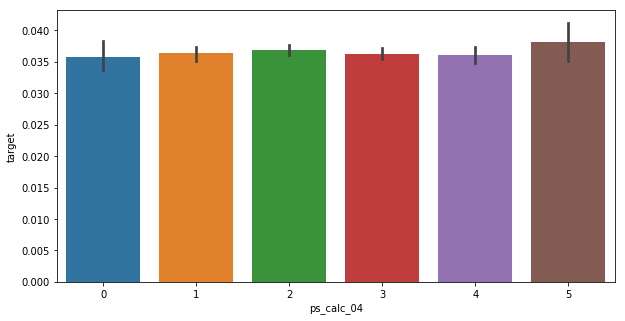

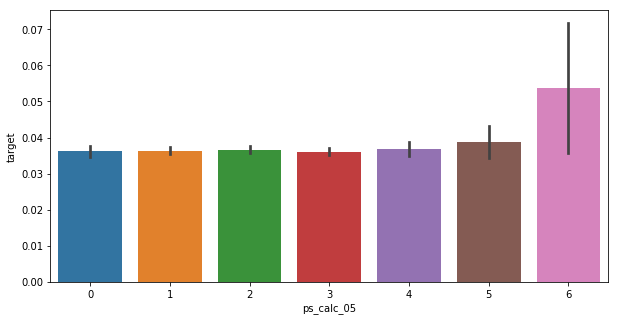

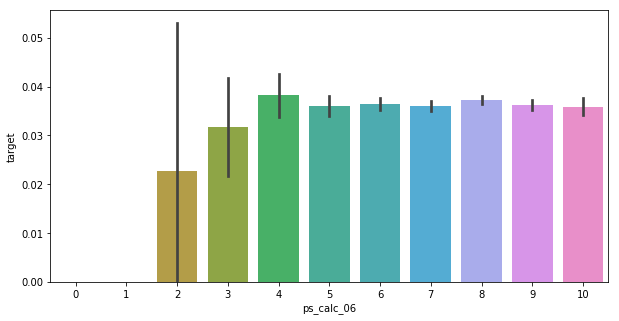

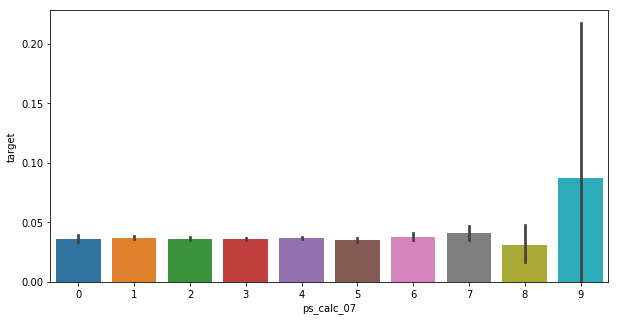

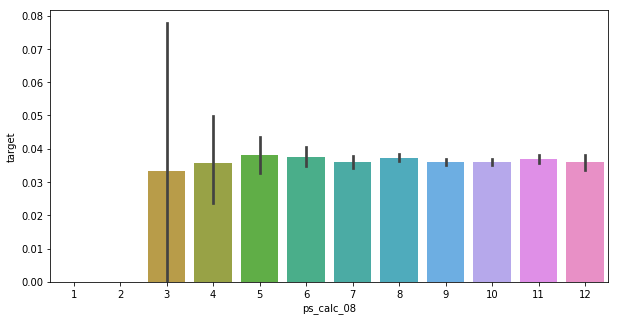

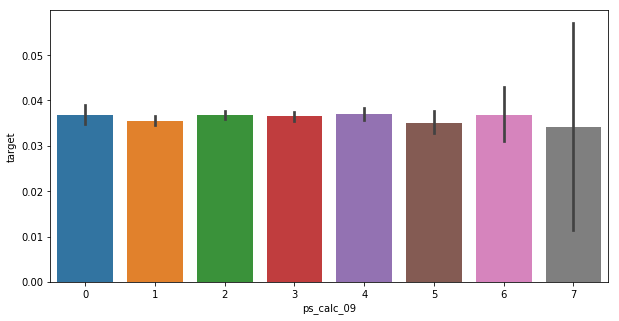

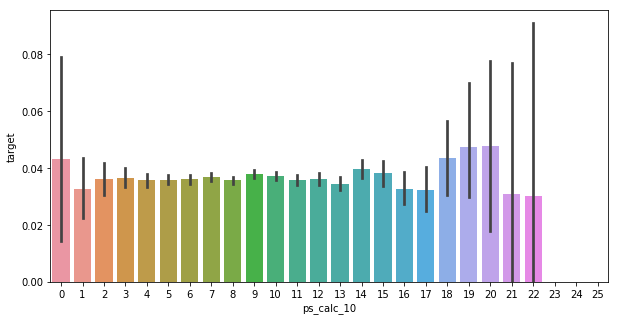

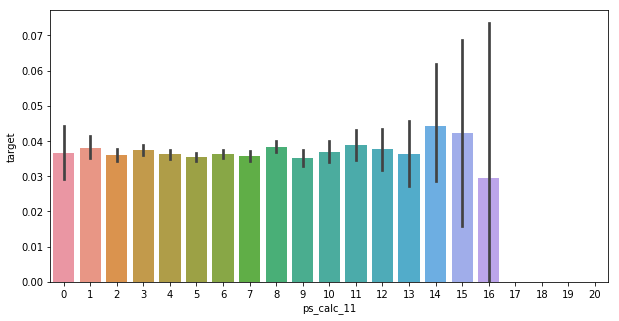

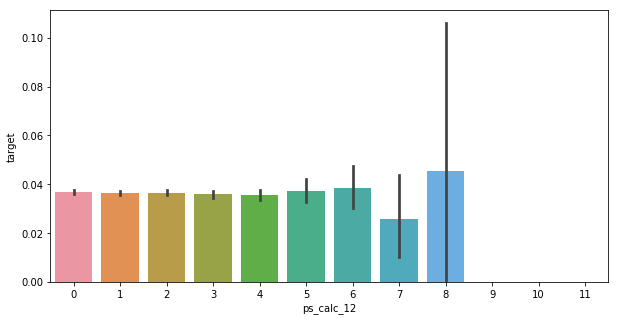

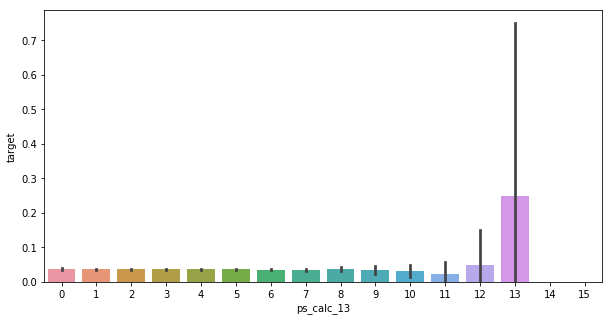

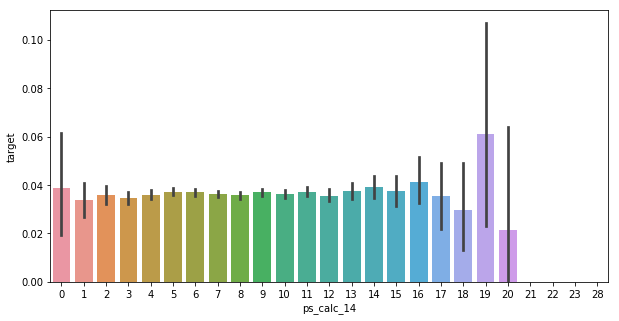

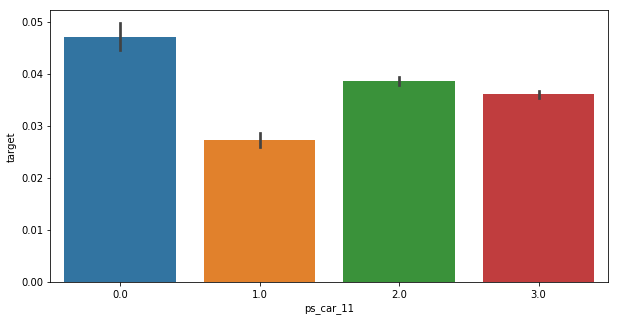

In [19]:
# plot binary, category, integer
# black line means 95% confidence interval
for col in binary + category + integer:
    bar_plot_ci(col, df)

### statistically useful variables
### ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_12_bin, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, 
### ps_ind_04_cat, ps_ind_05_cat, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_11_cat,
### ps_ind_01, ps_ind_03, ps_ind_15, ps_car_11

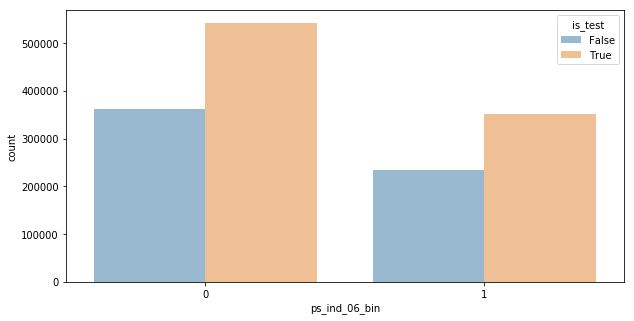

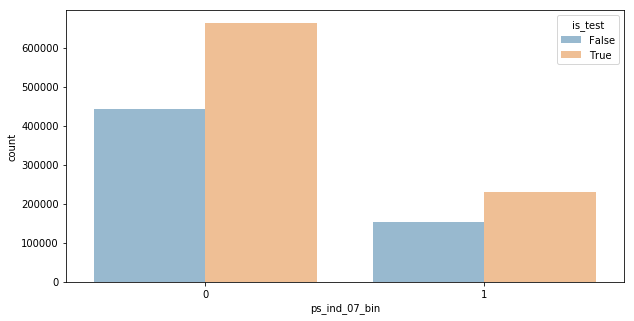

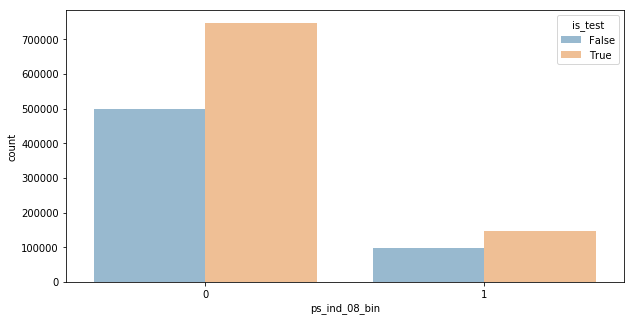

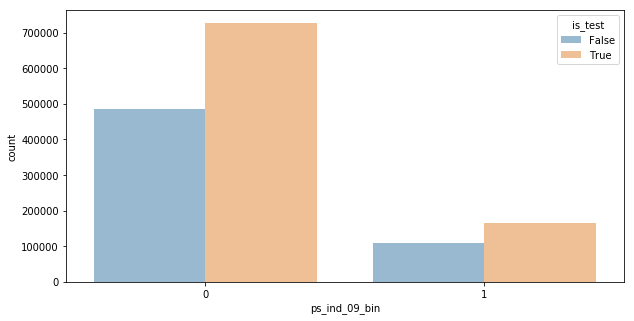

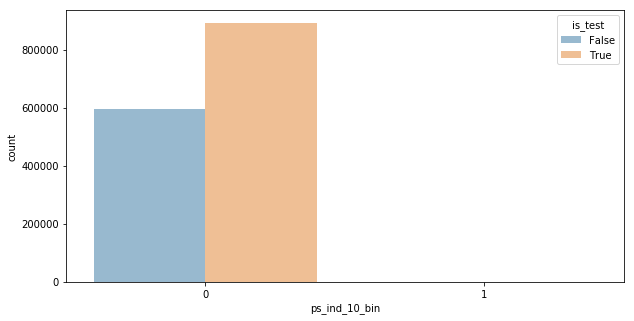

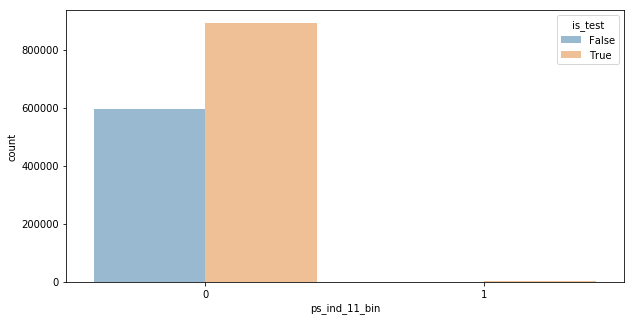

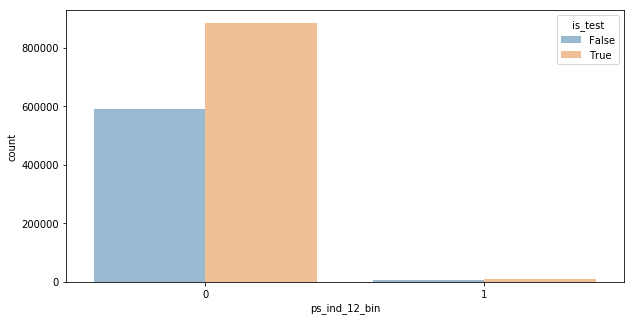

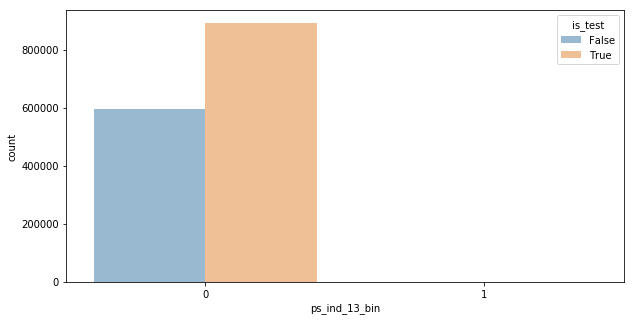

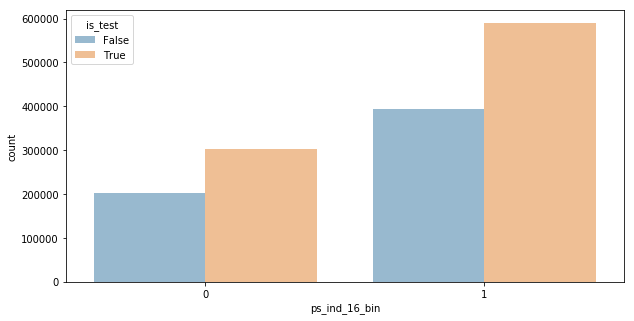

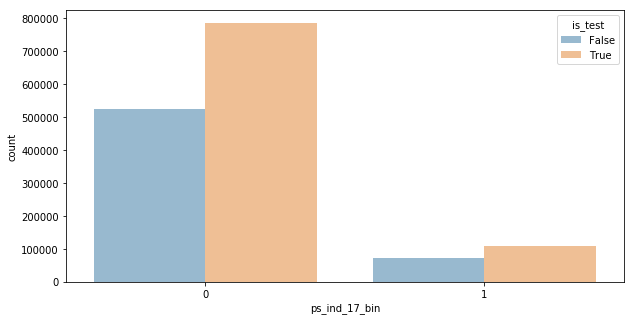

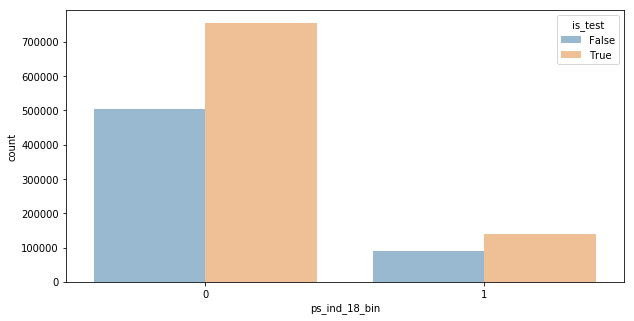

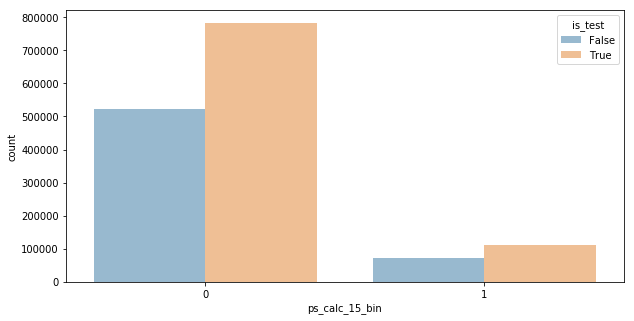

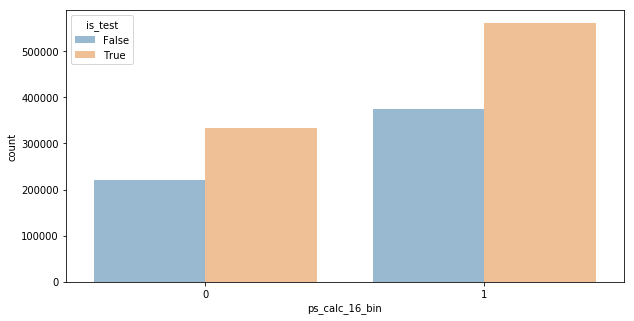

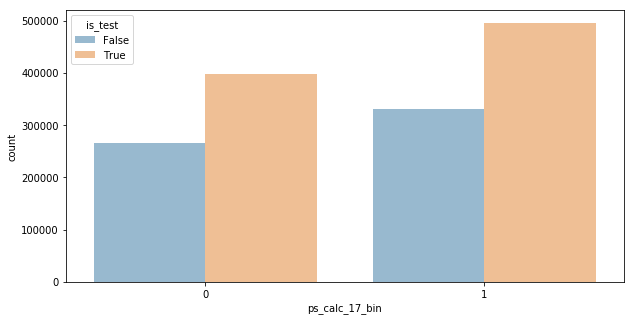

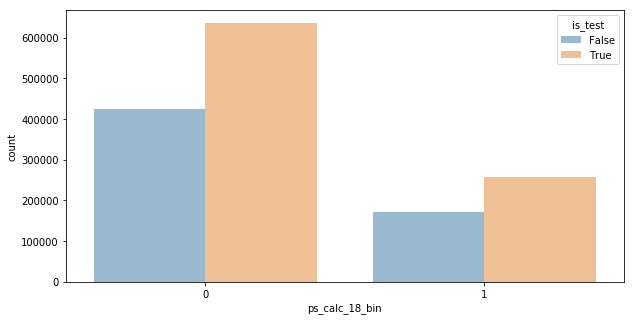

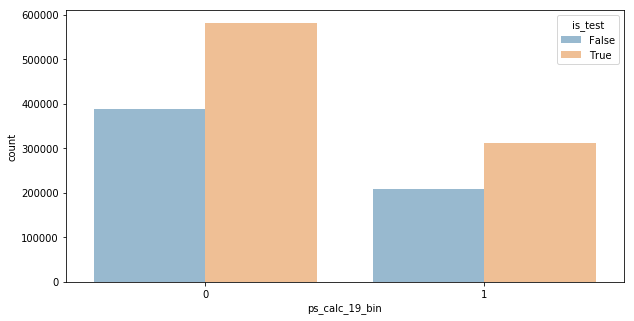

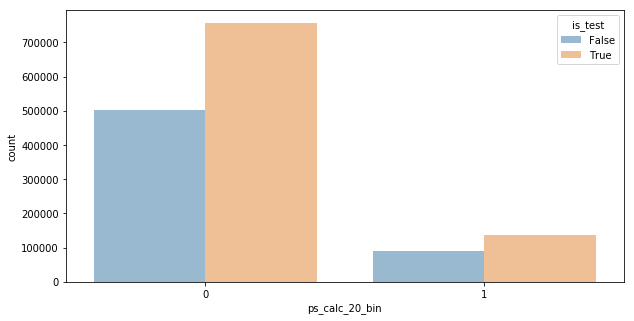

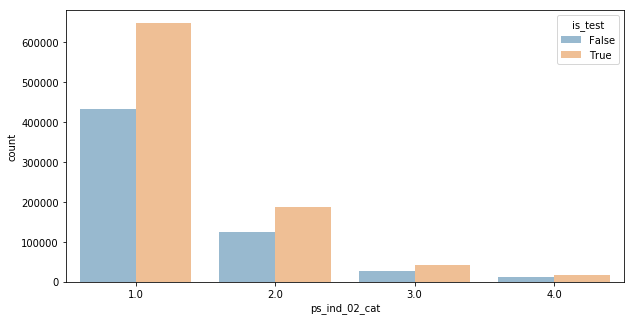

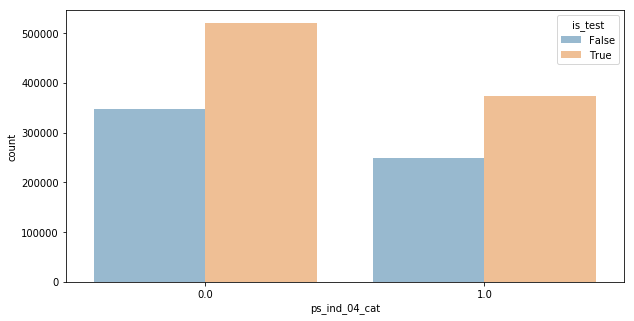

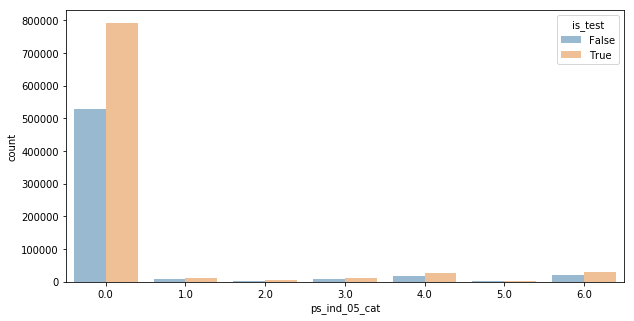

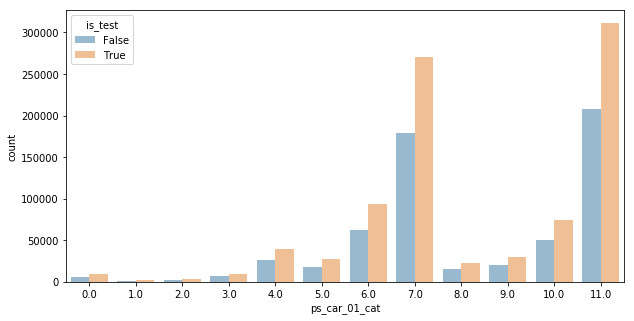

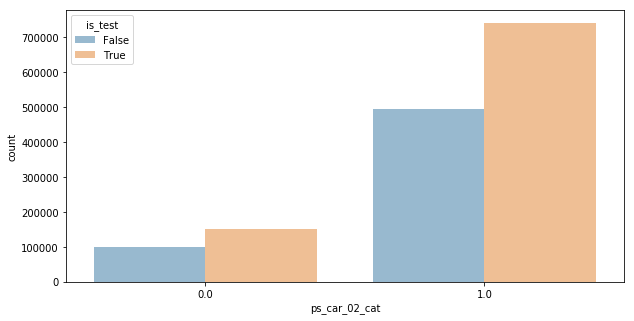

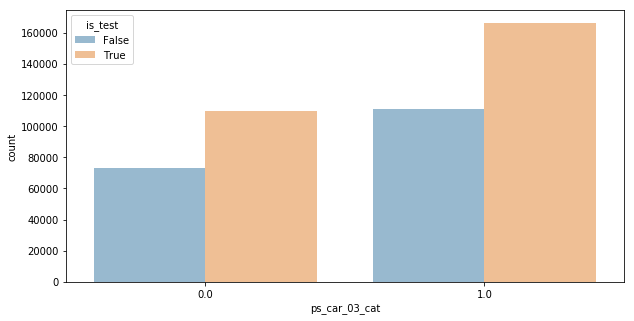

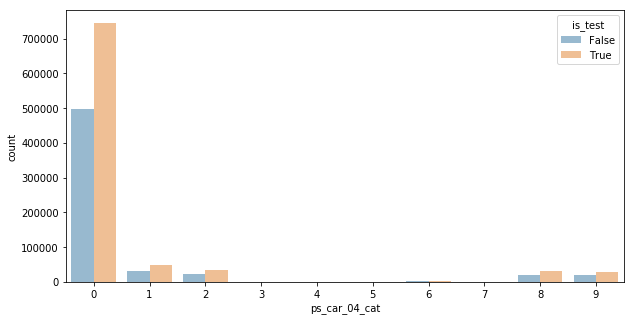

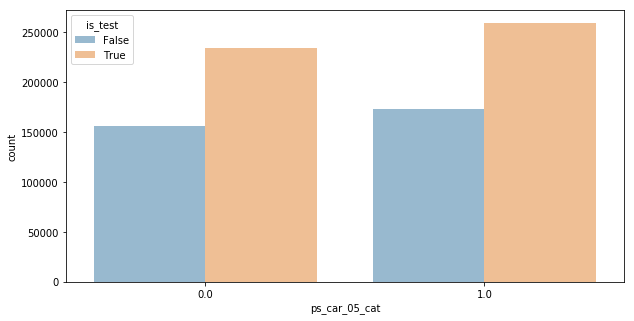

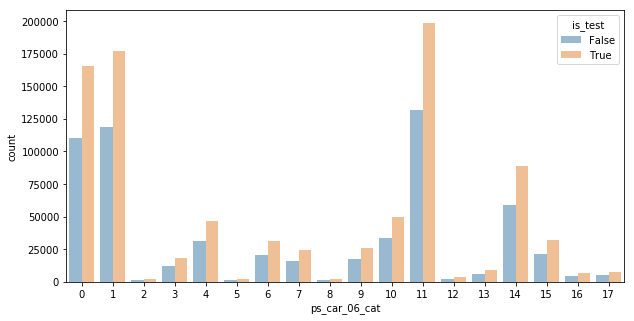

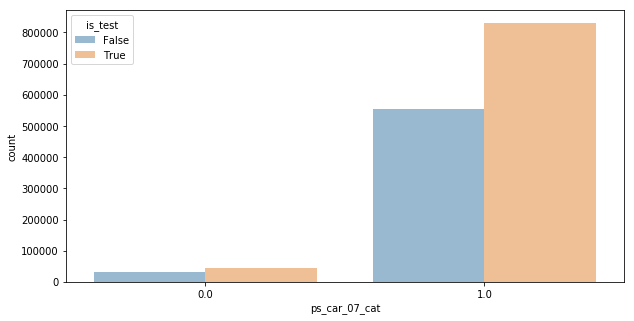

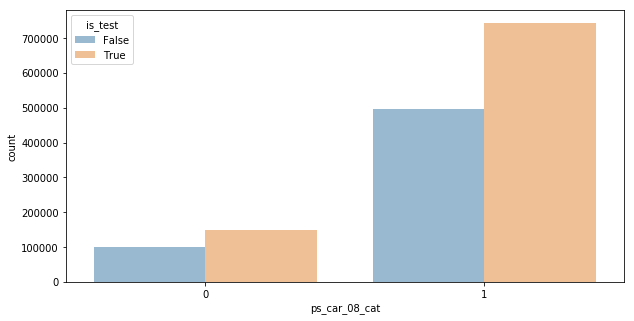

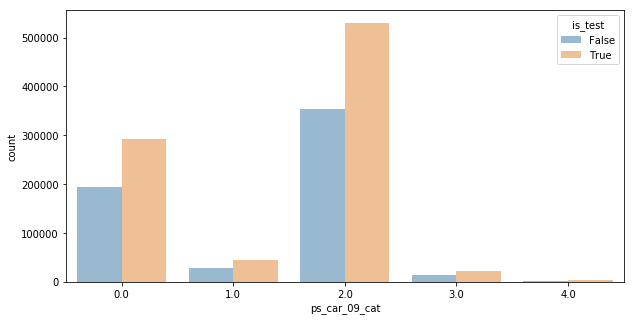

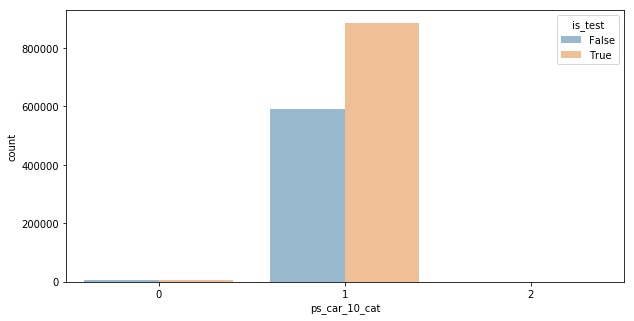

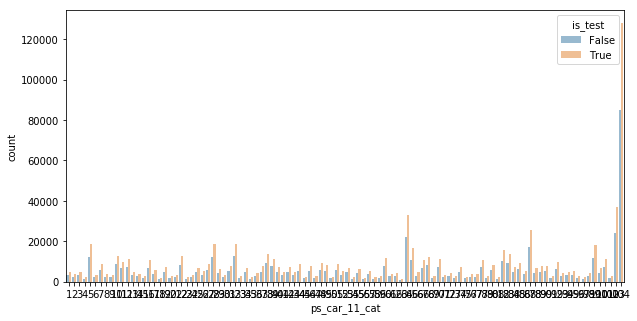

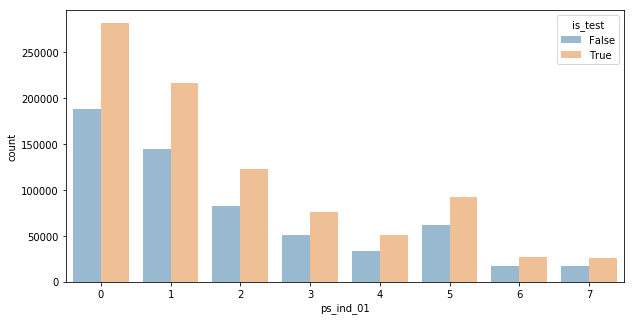

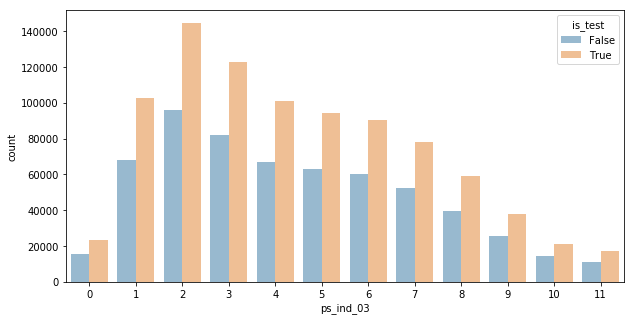

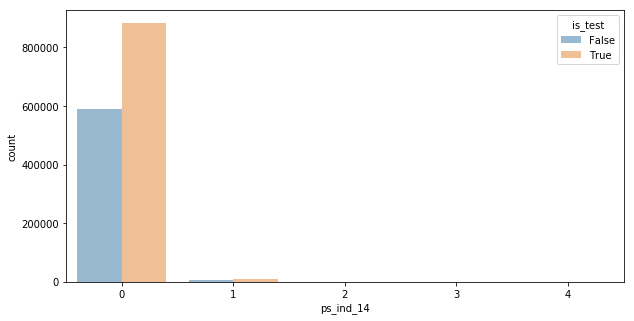

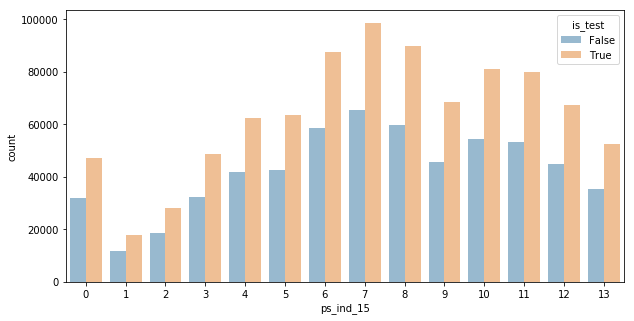

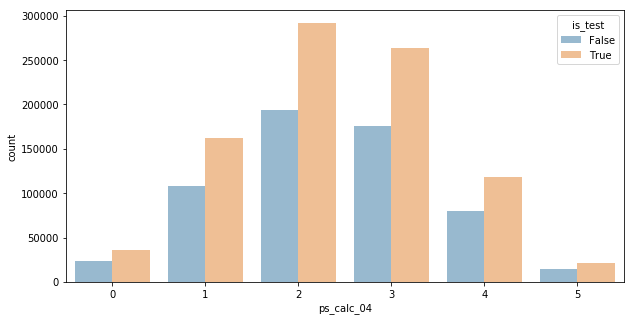

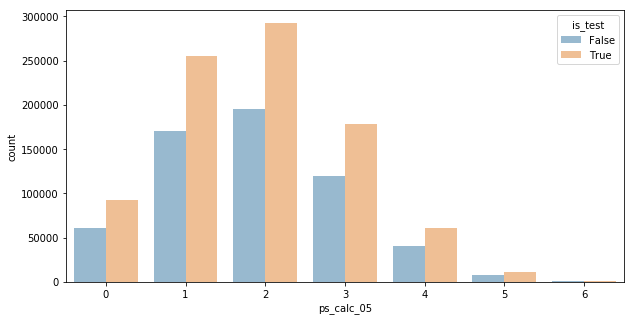

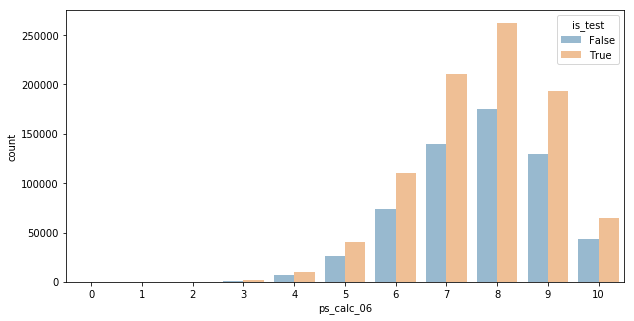

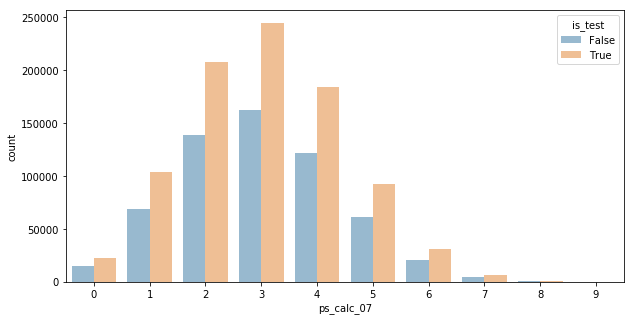

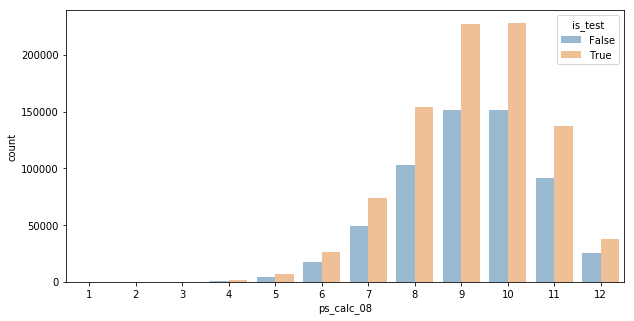

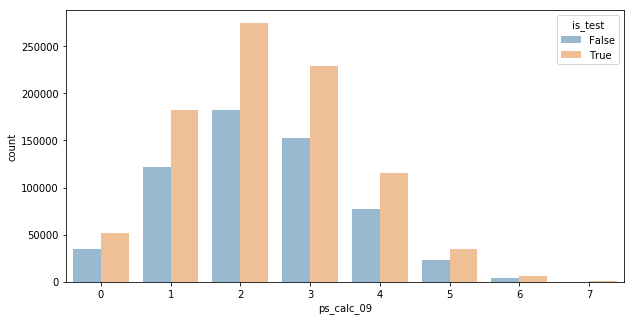

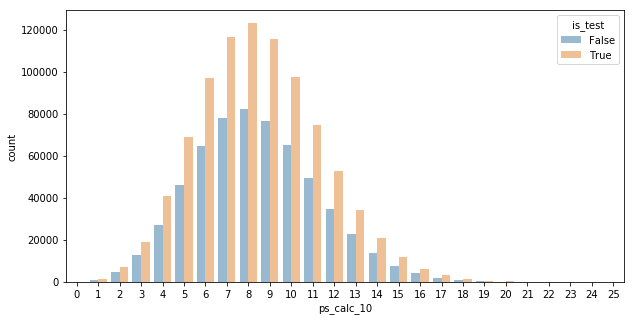

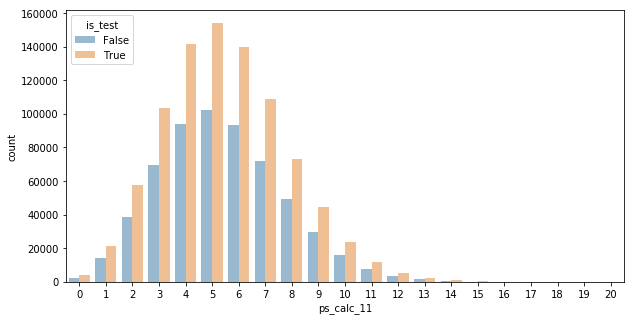

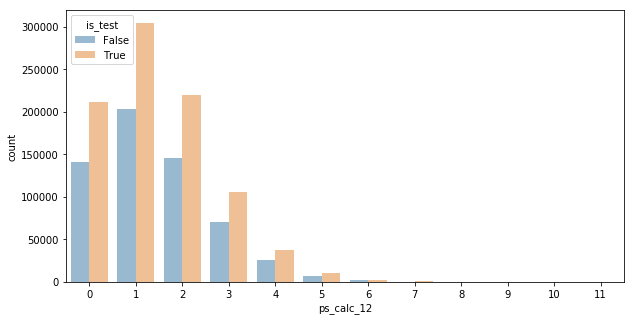

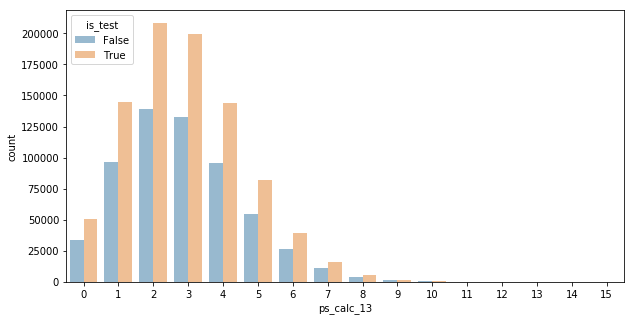

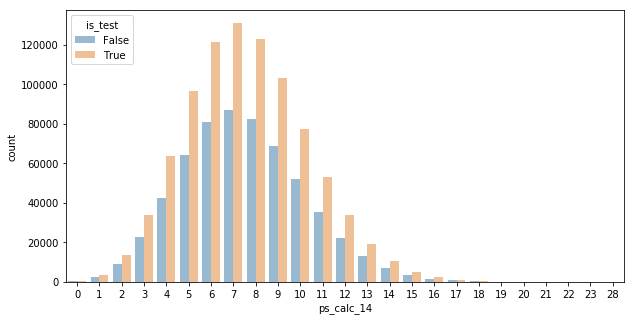

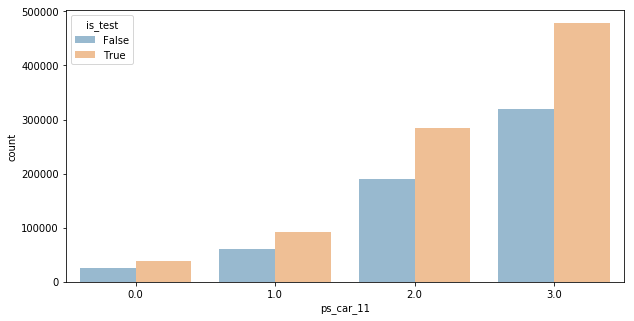

In [22]:
df['is_test'] = df['target'].isnull()

for col in binary + category + integer:
    bar_plot(col, df, 'is_test')

### baseline model

In [14]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
train_label = train['target']
train_id = train['id']
del train['target'], train['id']

test = pd.read_csv('test.csv')
test_id = test['id']
del test['id']

In [15]:
# derived variables
# NaN(-1) count
train['missing'] = (train==-1).sum(axis=1).astype(float)
test['missing'] = (test==-1).sum(axis=1).astype(float)

# sum of binary values
bin_features = [c for c in train.columns if 'bin' in c]
train['bin_sum'] = train[bin_features].sum(axis=1)
test['bin_sum'] = test[bin_features].sum(axis=1)

# choose variables for target encoding
features = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_12_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_11_cat', 'ps_ind_01', 'ps_ind_03', 'ps_ind_15', 'ps_car_11']

In [16]:
# LightGBM parameters
num_boost_round = 10000 # number of boosting iterations
params = {"objective": "binary",
          "boosting_type": "gbdt", # gbdt(gradient boosting decision tree)
          "learning_rate": 0.1, # 0.001~ 1.0
          "num_leaves": 15,
          "max_bin": 256,
          "feature_fraction": 0.6, # 60% of 223. smaller the value, increases more variety of models(same with colsample_bytree in XGBoost) 
          "verbosity": 0,
          "drop_rate": 0.1,
          "is_unbalance": False,
          "max_drop": 50,
          "min_child_samples": 10,
          "min_child_weight": 150,
          "min_split_gain": 0,
          "subsample": 0.9, # data used in single model learning
          "seed": 2018
}

In [5]:
from sklearn.model_selection import StratifiedKFold

In [11]:
import lightgbm as lgbm

In [12]:
def Gini(y_true, y_pred):
    # first compare the number of prediction and the answer
    assert y_true.shape == y_pred.shape
    n_samples = y_true.shape[0]

    # sort prediction value(y_pred) in ascending order
    arr = np.array([y_true, y_pred]).transpose()
    true_order = arr[arr[:, 0].argsort()][::-1, 0]
    pred_order = arr[arr[:, 1].argsort()][::-1, 0]

    # Compute Lorenz curves
    L_true = np.cumsum(true_order) * 1. / np.sum(true_order)
    L_pred = np.cumsum(pred_order) * 1. / np.sum(pred_order)
    L_ones = np.linspace(1 / n_samples, 1, n_samples)

    # compute Gini coefficient
    G_true = np.sum(L_ones - L_true)
    G_pred = np.sum(L_ones - L_pred)

    # Regularize Gini coefficient
    return G_pred * 1. / G_true

In [21]:
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', Gini(labels, preds), True

In [22]:
# use 5-fold StratifiedKFold(preserving the ratio of samples of data) for cross validation
NFOLDS = 5
kfold = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=218)
kf = kfold.split(train, train_label)

cv_train = np.zeros(len(train_label))
cv_pred = np.zeros(len(test_id))    
best_trees = []
fold_scores = []

for i, (train_fold, validate) in enumerate(kf): #enumerate is useful for lists
    # divide train, test data
    X_train, X_validate, label_train, label_validate = train.iloc[train_fold, :], train.iloc[validate, :], train_label[train_fold], train_label[validate]

    # target encoding
    for feature in features:
        # get mean of target variables per feature's unique values from train data
        map_dic = pd.DataFrame([X_train[feature], label_train]).T.groupby(feature).agg('mean') # 
        map_dic = map_dic.to_dict()['target']
        # map mean value to data
        X_train[feature + '_target_enc'] = X_train[feature].apply(lambda x: map_dic.get(x, 0))
        X_validate[feature + '_target_enc'] = X_validate[feature].apply(lambda x: map_dic.get(x, 0))
        test[feature + '_target_enc'] = test[feature].apply(lambda x: map_dic.get(x, 0))

    dtrain = lgbm.Dataset(X_train, label_train)
    dvalid = lgbm.Dataset(X_validate, label_validate, reference=dtrain)
    # use evalerror() to find optimized number of trees based on gini point
    # verbose_eval: evaluation metrics will be displayed every 100 stages
    bst = lgbm.train(params, dtrain, num_boost_round, valid_sets=dvalid, feval=evalerror, verbose_eval=100, early_stopping_rounds=100)
    best_trees.append(bst.best_iteration)
    # add test data prediction to cv_pred
    cv_pred += bst.predict(test, num_iteration=bst.best_iteration)
    cv_train[validate] += bst.predict(X_validate)
    
    # print evaluation score
    score = Gini(label_validate, cv_train[validate])
    print(score)
    fold_scores.append(score)
    
cv_pred /= NFOLDS

print("cv score:")
print(Gini(train_label, cv_train))
print(fold_scores)
print(best_trees, np.mean(best_trees))

pd.DataFrame({'id': test_id, 'target': cv_pred}).to_csv('lgbm_baseline.csv', index= False)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.151606	valid_0's gini: 0.287939
[200]	valid_0's binary_logloss: 0.151608	valid_0's gini: 0.287492
Early stopping, best iteration is:
[132]	valid_0's binary_logloss: 0.151591	valid_0's gini: 0.287982
0.2879823369169921
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.152424	valid_0's gini: 0.264158
Early stopping, best iteration is:
[82]	valid_0's binary_logloss: 0.1524	valid_0's gini: 0.265387
0.2653866946078528
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.152227	valid_0's gini: 0.276015
[200]	valid_0's binary_logloss: 0.152186	valid_0's gini: 0.277444
[300]	valid_0's binary_logloss: 0.152259	valid_0's gini: 0.274823
Early stopping, best iteration is:
[202]	valid_0's binary_logloss: 0.152175	valid_0's gini: 0.277855
0.2778554545445485
Training until validation scores don't improve for 100 rou